# Trabajo de Fin de Grado
## Machine Learning para el tratamiento de datos y la detección de exoplanetas mediante el método de tránsito

##### Resumen
Uno de los siguientes pasos en la exploración espacial es encontrar planetas más allá del sistema solar que, potencialmente, puedan albergar signos de vida extraterrestre. Estos planetas que orbitan otras estrellas son conocidos como exoplanetas. Las complejas técnicas utilizadas para su detección recaban una inmensa cantidad de datos que deben ser cuidadosamente tratados y adecuados para su posterior análisis en busca de estos mundos.
	Uno de estos métodos, el de tránsito, consiste en observar las estrellas en busca de disminuciones de luz provocadas por posibles exoplanetas transitando entre la estrella y el observador. Esta información queda plasmada en los datos recogidos por los telescopios, que deben ser procesados, tratados y analizados. Estas tareas se pueden llevar a cabo de forma masiva y automatizada mediante distintas técnicas de *machine learning*.
	En este proyecto se presentarán las principales técnicas y modelos de machine learning para el tratamiento y clasificación de datos, se emplearán algunas de ellas para adecuar conjuntos de datos de observaciones realizadas por la misión *Kepler* de la NASA y, finalmente, se construirá un modelo de predicción y se analizará su precisión a la hora de detectar exoplanetas.

In [82]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from scipy import ndimage
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

## Datos de entrenamiento

In [2]:
kepler_train_data_file_path = "../TFG/datos/exoTrain.csv"
kepler_train_data = pd.read_csv(kepler_train_data_file_path)

pd.DataFrame(kepler_train_data)

LABEL   FLUX.1   FLUX.2   FLUX.3   FLUX.4   FLUX.5   FLUX.6  FLUX.7  \
0         2    93.85    83.81    20.10   -26.98   -39.56  -124.71 -135.18   
1         2   -38.88   -33.83   -58.54   -40.09   -79.31   -72.81  -86.55   
2         2   532.64   535.92   513.73   496.92   456.45   466.00  464.50   
3         2   326.52   347.39   302.35   298.13   317.74   312.70  322.33   
4         2 -1107.21 -1112.59 -1118.95 -1095.10 -1057.55 -1034.48 -998.34   
...     ...      ...      ...      ...      ...      ...      ...     ...   
5082      1   -91.91   -92.97   -78.76   -97.33   -68.00   -68.24  -75.48   
5083      1   989.75   891.01   908.53   851.83   755.11   615.78  595.77   
5084      1   273.39   278.00   261.73   236.99   280.73   264.90  252.92   
5085      1     3.82     2.09    -3.29    -2.88     1.66    -0.75    3.85   
5086      1   323.28   306.36   293.16   287.67   249.89   218.30  188.86   

       FLUX.8  FLUX.9  ...  FLUX.3188  FLUX.3189  FLUX.3190  FLUX.3191  \
0      -96.27  -79.89  ...     -78.07    -102.15    -102.15      25.13   
1      -85.33  -83.97  ...      -3.28     -32.21     -32.21     -24.89   
2      486.39  436.56  ...     -71.69      13.31      13.31     -29.89   
3      311.31  312.42  ...       5.71      -3.73      -3.73      30.05   
4    -1022.71 -989.57  ...    -594.37    -401.66    -401.66    -357.24   
...       ...     ...  ...        ...        ...        ...        ...   
5082   -49.25  -30.92  ...     139.95     147.26     156.95     155.64   
5083   458.87  492.84  ...     -26.50      -4.84     -76.30     -37.84   
5084   254.88  237.60  ...     -26.82     -53.89     -48.71      30.99   
5085    -0.03    3.28  ...      10.86      -3.23      -5.10      -4.61   
5086   178.93  118.93  ...      71.19       0.97      55.20      -1.63   

      FLUX.3192  FLUX.3193  FLUX.3194  FLUX.3195  FLUX.3196  FLUX.3197  
0         48.57      92.54      39.32      61.42       5.08     -39.54  
1         -4.86       0.76     -11.70       6.46      16.00      19.93  
2        -20.88       5.06     -11.80     -28.91     -70.02     -96.67  
3         20.03     -12.67      -8.77     -17.31     -17.35      13.98  
4       -443.76    -438.54    -399.71    -384.65    -411.79    -510.54  
...         ...        ...        ...        ...        ...        ...  
5082     156.36     151.75     -24.45     -17.00       3.23      19.28  
5083    -153.83    -136.16      38.03     100.28     -45.64      35.58  
5084      15.96      -3.47      65.73      88.42      79.07      79.43  
5085      -9.82      -1.50      -4.65     -14.55      -6.41      -2.55  
5086      -5.50     -25.33     -41.31     -16.72     -14.09      27.82  

[5087 rows x 3198 columns]

## Datos de test

In [3]:
kepler_test_data_file_path = "../TFG/datos/exoTest.csv"
kepler_test_data = pd.read_csv(kepler_test_data_file_path)

pd.DataFrame(kepler_test_data)

LABEL   FLUX.1   FLUX.2   FLUX.3   FLUX.4   FLUX.5   FLUX.6   FLUX.7  \
0        2   119.88   100.21    86.46    48.68    46.12    39.39    18.57   
1        2  5736.59  5699.98  5717.16  5692.73  5663.83  5631.16  5626.39   
2        2   844.48   817.49   770.07   675.01   605.52   499.45   440.77   
3        2  -826.00  -827.31  -846.12  -836.03  -745.50  -784.69  -791.22   
4        2   -39.57   -15.88    -9.16    -6.37   -16.13   -24.05    -0.90   
..     ...      ...      ...      ...      ...      ...      ...      ...   
565      1   374.46   326.06   319.87   338.23   251.54   209.84   186.35   
566      1    -0.36     4.96     6.25     4.20     8.26    -9.53   -10.10   
567      1   -54.01   -44.13   -41.23   -42.82   -39.47   -24.88   -31.14   
568      1    91.36    85.60    48.81    48.69    70.05    22.30    11.63   
569      1  3071.19  2782.53  2608.69  2325.47  2089.37  1769.56  1421.09   

      FLUX.8   FLUX.9  ...  FLUX.3188  FLUX.3189  FLUX.3190  FLUX.3191  \
0       6.98     6.63  ...      14.52      19.29      14.44      -1.62   
1    5569.47  5550.44  ...    -581.91    -984.09   -1230.89   -1600.45   
2     362.95   207.27  ...      17.82     -51.66     -48.29     -59.99   
3    -746.50  -709.53  ...     122.34      93.03      93.03      68.81   
4     -45.20    -5.04  ...     -37.87     -61.85     -27.15     -21.18   
..       ...      ...  ...        ...        ...        ...        ...   
565   167.46   135.45  ...    -123.55    -166.90    -222.44    -209.71   
566    -4.54   -11.55  ...     -12.40      -5.99     -17.94     -11.96   
567   -24.71   -13.12  ...      -0.73      -1.64       1.58      -4.82   
568    37.86    28.27  ...       2.44      11.53     -16.42     -17.86   
569  1142.09   902.31  ...     695.41     865.97     882.41    1203.06   

     FLUX.3192  FLUX.3193  FLUX.3194  FLUX.3195  FLUX.3196  FLUX.3197  
0        13.33      45.50      31.93      35.78     269.43      57.72  
1     -1824.53   -2061.17   -2265.98   -2366.19   -2294.86   -2034.72  
2       -82.10    -174.54     -95.23    -162.68     -36.79      30.63  
3         9.81      20.75      20.25    -120.81    -257.56    -215.41  
4       -33.76     -85.34     -81.46     -61.98     -69.34     -17.84  
..         ...        ...        ...        ...        ...        ...  
565    -180.16    -166.83    -235.66    -213.63    -205.99    -194.07  
566     -12.11     -13.68      -3.59      -5.32     -10.98     -11.24  
567     -11.93     -17.14      -4.25       5.47      14.46      18.70  
568      21.10     -10.25     -37.06      -8.43      -6.48      17.60  
569    1293.03    1354.41    -192.81    -277.22     -69.63     121.56  

[570 rows x 3198 columns]

## Representación Gráfica de los datos sin tratar
#### Diferencias entre estrellas sin exoplanetas y estrellas con exoplanetas
Estrellas sin exoplanetas ('LABEL' = 1)

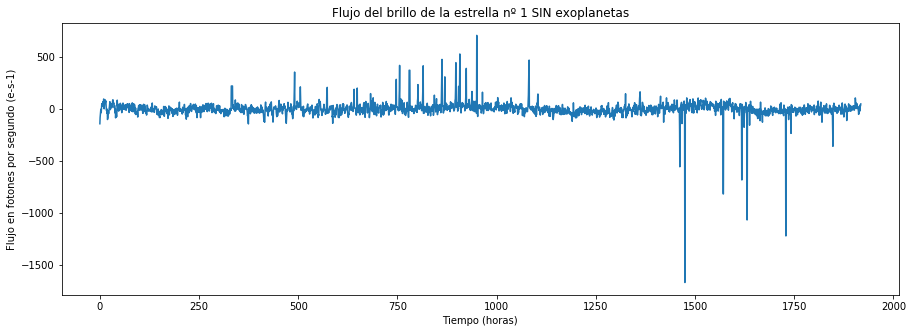

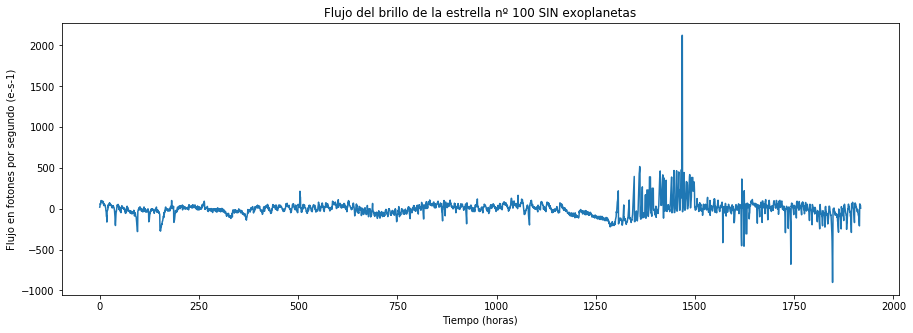

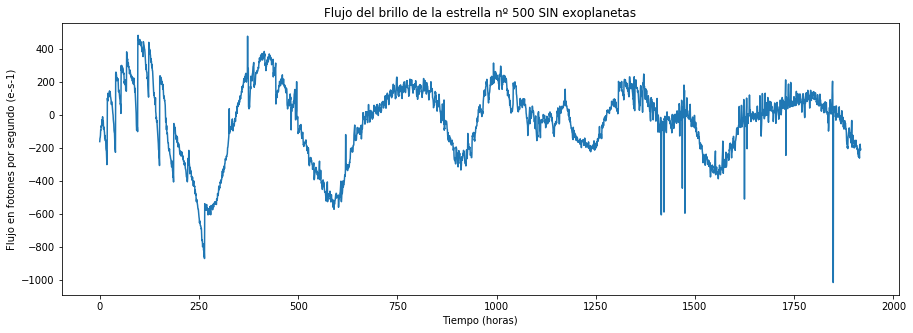

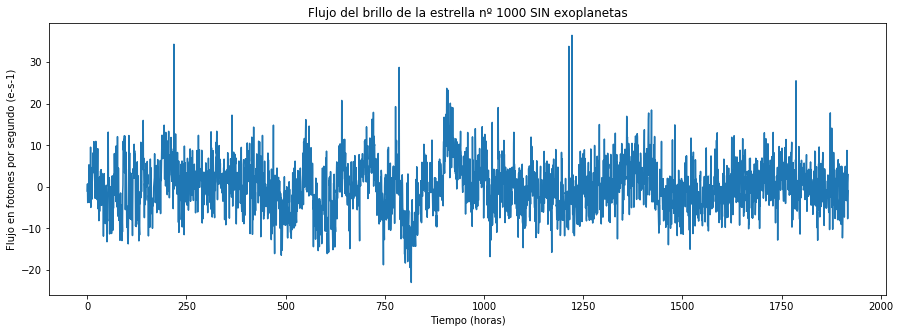

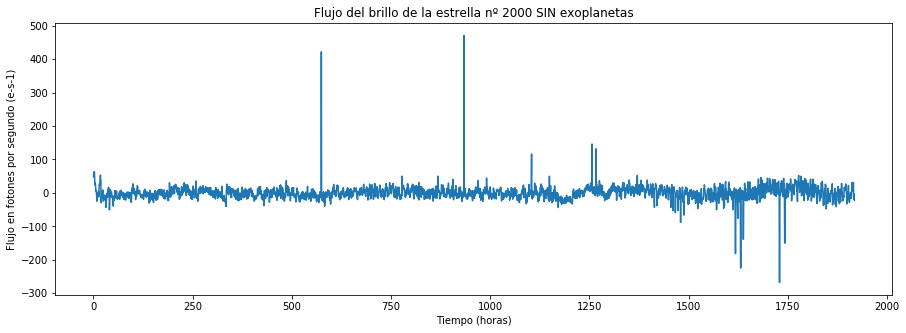

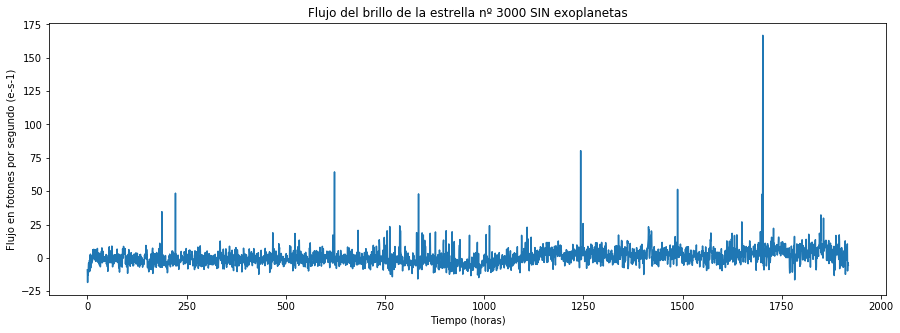

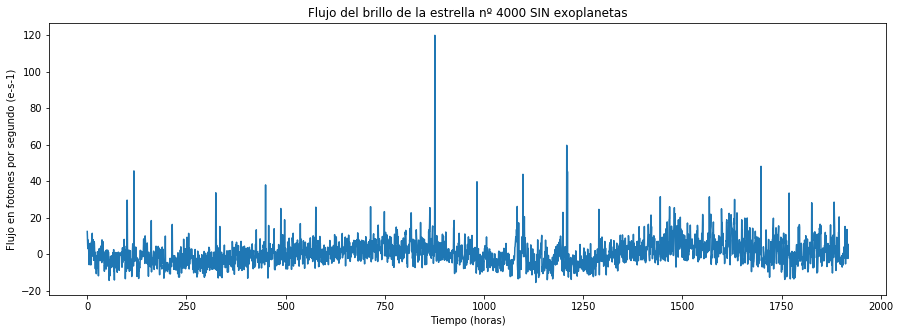

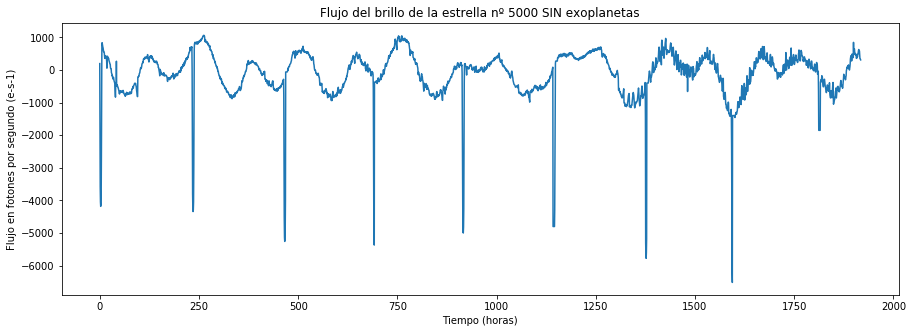

In [4]:
for i in [0, 99, 499, 999, 1999, 2999, 3999, 4999]:
    #Se extraen los datos de las distintas mediciones de luz, eliminando la columna "LABEL"
    flujo = kepler_train_data[kepler_train_data.LABEL == 1].drop('LABEL', axis = 1).iloc[i,:]
    tiempo = np.arange(len(flujo)) * (36/60) #Variable "tiempo" en horas
    plt.figure(figsize=(15, 5)) #Tamaño del gráfico
    plt.title('Flujo del brillo de la estrella nº {} SIN exoplanetas'.format(i+1))
    plt.xlabel('Tiempo (horas)')
    plt.ylabel('Flujo en fotones por segundo (e-s-1)')
    plt.plot(tiempo, flujo)

Estrellas con exoplanetas ('LABEL' = 2)

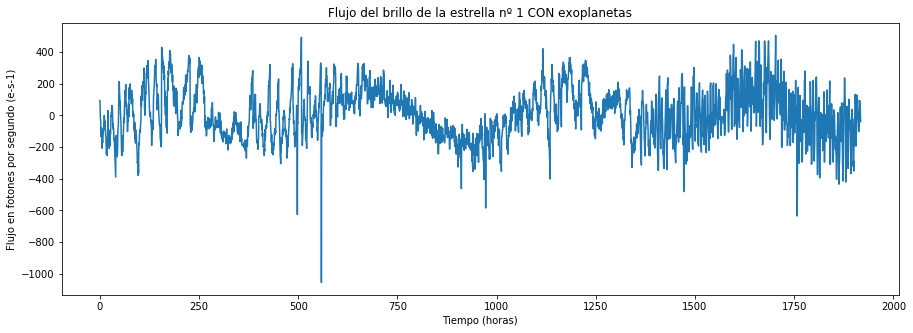

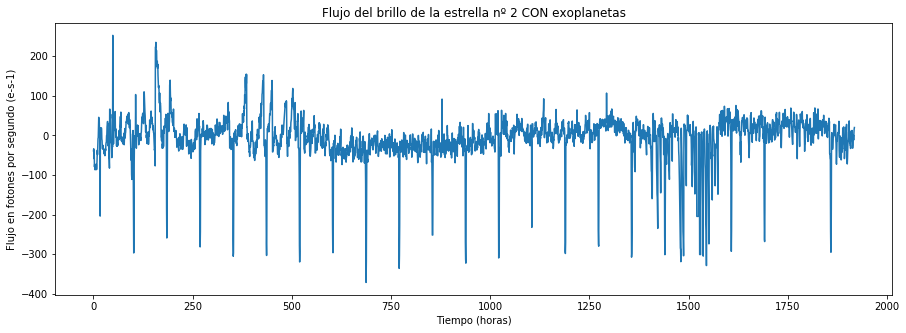

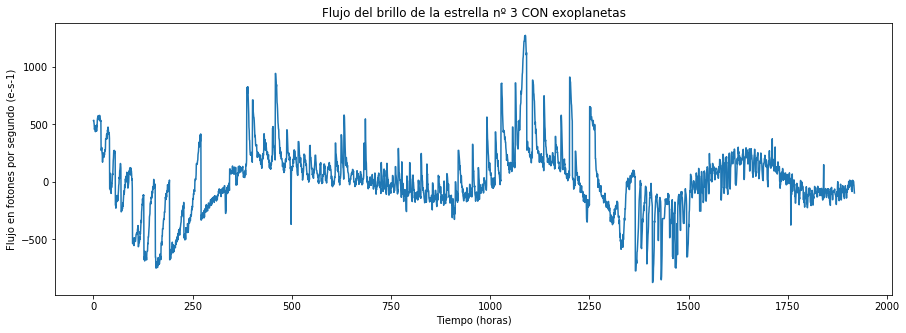

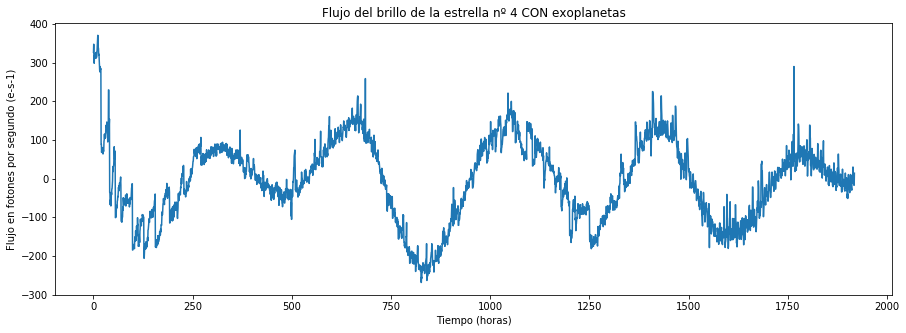

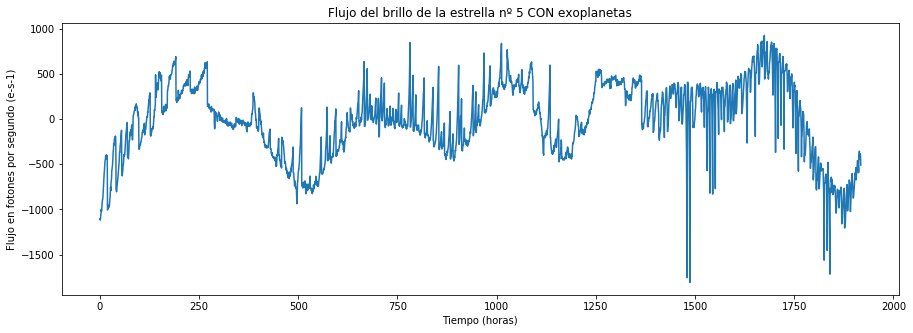

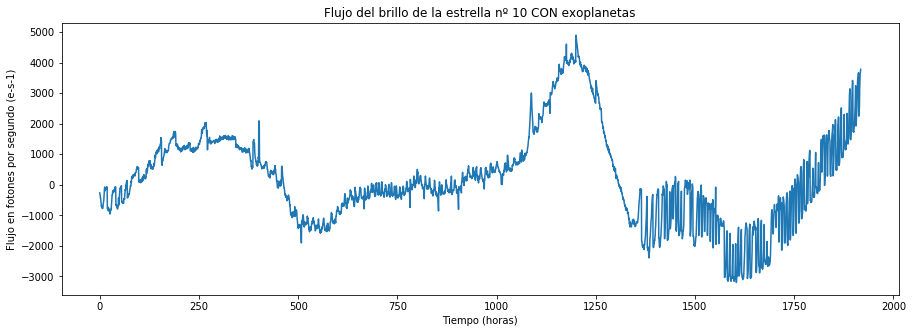

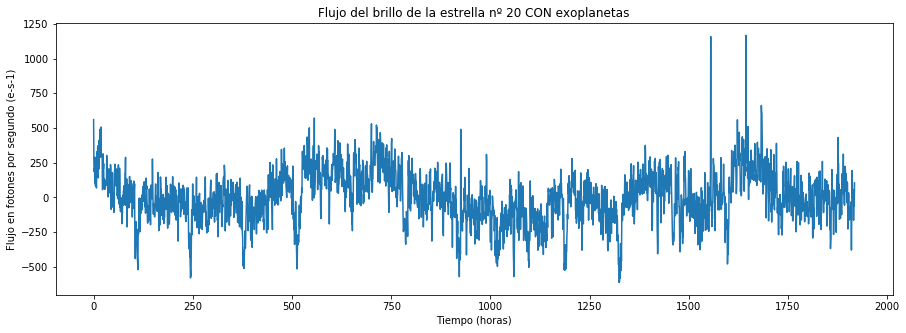

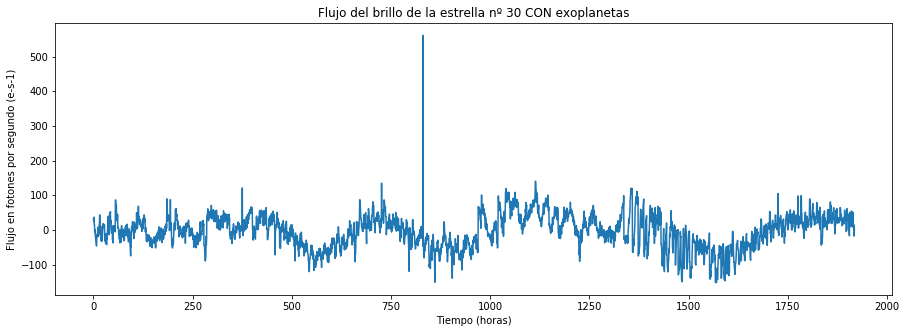

In [5]:
for i in [0, 1, 2, 3, 4, 9, 19, 29]:
    #Se extraen los datos de las distintas mediciones de luz, eliminando la columna "LABEL"
    flujo = kepler_train_data[kepler_train_data.LABEL == 2].drop('LABEL', axis = 1).iloc[i,:]
    tiempo = np.arange(len(flujo)) * (36/60) #Variable "tiempo" en horas
    plt.figure(figsize=(15, 5)) #Tamaño del gráfico
    plt.title('Flujo del brillo de la estrella nº {} CON exoplanetas'.format(i+1))
    plt.xlabel('Tiempo (horas)')
    plt.ylabel('Flujo en fotones por segundo (e-s-1)')
    plt.plot(tiempo, flujo)

# Tratamiento de los datos
Como se puede observar, las gráficas de los flujos de luz de las estrellas se presentan de forma muy heterogénea en cuanto a forma y magnitud de los datos, por lo que es necesario adaptarlos a un estándar para que el entrenamiento del modelo no se vea influenciado por estas diferencias.

Se va a utilizar la estrella nº 10 CON exoplanetas a modo de ejemplo del tratamiento de datos y, posteriormente, se aplicará a todo el conjunto de datos.

## Abstracción del flujo
Se van a aplicar diferentes métodos para que los datos de cada estrella reflejen únicamente las variaciones de luz absolutas con el objetivo de facilitar la identificación de patrones mediante las variaciones de flujo que sí son indicativas de la presencia de exoplanetas.

Esto es necesario ya que cada estrella tiene una intensidad diferente debido a la multitud de tamaños, formas de rotación, heterogeneidad de superficies, etc. que presentan. Es por esto que cada estrella tiene una forma diferente de brillar que puede variar de múltiples formas incluso en una misma estrella. El objetivo es eliminar estas variaciones para desvincular las variaciones de flujo provocadas por posibles exoplanetas de las variaciones derivadas de las fluctuaciones de la propia estrella.

Para ello, es necesario encontrar un flujo general de los datos que se pueda sustraer del flujo original para obtener su representación plana relativa.

Primero, se va a utilizar la técnica de desenfoque gaussiano para "suavizar" los datos.

###### Esta es la estrella nº 10 CON exoplanetas sin ningún tipo de tratamiento.

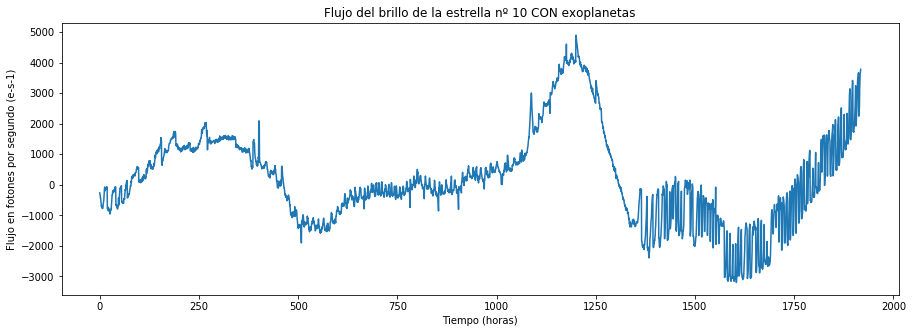

In [6]:
i = 9
#Se extraen los datos de las distintas mediciones de luz, eliminando la columna "LABEL"
flujo1 = kepler_train_data[kepler_train_data.LABEL == 2].drop('LABEL', axis = 1).iloc[i,:]
tiempo = np.arange(len(flujo1)) * (36/60) #Variable "tiempo" en horas
plt.figure(figsize=(15, 5)) #Tamaño del gráfico
#Etiquetas
plt.title('Flujo del brillo de la estrella nº {} CON exoplanetas'.format(i+1))
plt.xlabel('Tiempo (horas)')
plt.ylabel('Flujo en fotones por segundo (e-s-1)')
plt.plot(tiempo, flujo1)

#### 1. Desenfoque gaussiano.
Se utiliza este método para abstraer el flujo de fluctuaciones propias de la estrella

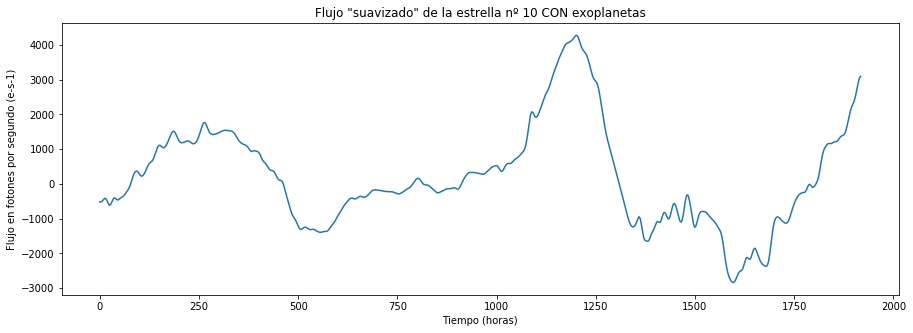

In [7]:
flujo2 = ndimage.filters.gaussian_filter(flujo1, sigma = 10) #Se crea la variable 'flujo2' con el resultado de aplicar el desenfoque gaussiano con sigma = 10
tiempo = np.arange(len(flujo2)) * (36/60) #Variable "tiempo" en horas
plt.figure(figsize=(15, 5)) #Tamaño del gráfico
#Etiquetas
plt.title('Flujo "suavizado" de la estrella nº {} CON exoplanetas'.format(i+1))
plt.xlabel('Tiempo (horas)')
plt.ylabel('Flujo en fotones por segundo (e-s-1)')
plt.plot(tiempo, flujo2)

#### 2. Desvinculación de la tendencia de fluctuaciones de la estrella.
Para abstraer esta información, se restan el flujo de datos original y el flujo de datos resultante del desenfoque gaussiano. Este nuevo flujo reflejará las variaciones de luz independientes de la tendencia de flujo de la estrella para mostrar aquellas variaciones que son relevantes para la detección de exoplanetas

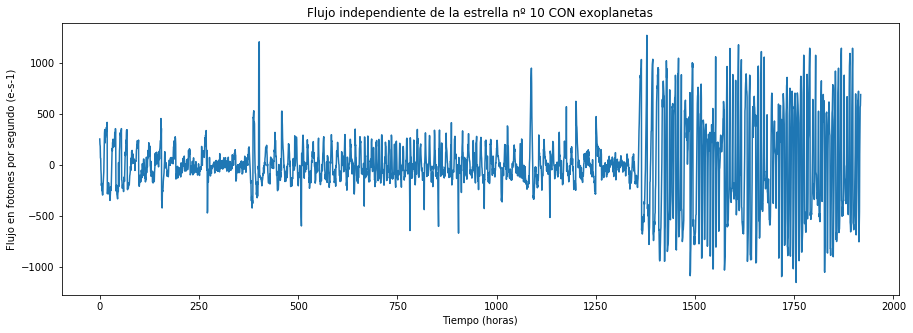

In [8]:
flujo3 = flujo1 - flujo2
tiempo = np.arange(len(flujo3)) * (36/60) #Variable "tiempo" en horas
plt.figure(figsize=(15, 5)) #Tamaño del gráfico
#Etiquetas
plt.title('Flujo independiente de la estrella nº {} CON exoplanetas'.format(i+1))
plt.xlabel('Tiempo (horas)')
plt.ylabel('Flujo en fotones por segundo (e-s-1)')
plt.plot(tiempo, flujo3)

#### 3. Normalización

El siguiente paso es normalizar el flujo de datos

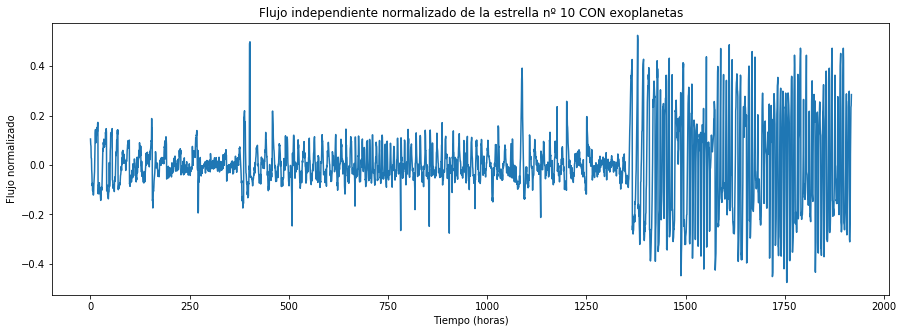

In [9]:
flujo3n = (flujo3 - np.mean(flujo3)) / (np.max(flujo3) - np.min(flujo3))
tiempo = np.arange(len(flujo3n)) * (36/60) #Variable "tiempo" en horas
plt.figure(figsize=(15, 5)) #Tamaño del gráfico
#Etiquetas
plt.title('Flujo independiente normalizado de la estrella nº {} CON exoplanetas'.format(i+1))
plt.xlabel('Tiempo (horas)')
plt.ylabel('Flujo normalizado')
plt.plot(tiempo, flujo3n)

#### 4. Eliminar datos atípicos superiores
Los exoplanetas provocan una disminución de la luz percibida de la estrella al transitar delante de ella, por lo que es necesario eliminar todos los datos atípicos superiores, ya que son los inferiores los que son relevantes.

In [10]:
def eliminar_datos_atipicos_superiores(X, reducir = 0.01, amplitud=4):
#https://www.kaggle.com/muonneutrino/exoplanet-data-visualization-and-exploration
    longitud = len(X.iloc[0,:])
    eliminar = int(longitud*reducir)
    for i in X.index.values:
        valores = X.loc[i,:]
        valores_ordenados = valores.sort_values(ascending = False)
        for j in range(eliminar):
            idx = valores_ordenados.index[j]
            #print(idx)
            nuevo_valor = 0
            c = 0
            idx_num = int(idx[5:])
            for k in range(2*amplitud+1):
                idx2 = idx_num + k - amplitud
                if idx2 <1 or idx2 >= longitud or idx_num == idx2:
                    continue
                nuevo_valor += valores['FLUX.'+str(idx2)]
                
                c += 1
            nuevo_valor /= c
            if nuevo_valor < valores[idx]:
                X.at[i,idx] = nuevo_valor
        
            
    return X

## Aplicar este proceso a todo el *dataset* de entrenamiento y test

#### Crear una función para aplicar el desenfoque Gaussiano, la abstracción de flujo y la normalización de los datos

In [11]:
def abstraer_normalizar_flujo(X):
    flujo1 = X
    flujo2 = ndimage.filters.gaussian_filter(flujo1, sigma = 10) #Desenfoque Gaussiano
    flujo3 = flujo1 - flujo2 #Abstraccion de flujo
    flujo3n = (flujo3 - np.mean(flujo3)) / (np.max(flujo3) - np.min(flujo3)) #Normalizacion
    return flujo3n

#### Aplicar los pasos anteriores a todos los datos tanto de entrenamiento como de test

In [12]:
kepler_train_data.iloc[:,1:] = kepler_train_data.iloc[:,1:].apply(abstraer_normalizar_flujo,axis=1) #Aplicar pasos 1, 2 y 3 en datos de entrenamiento
kepler_test_data.iloc[:,1:] = kepler_test_data.iloc[:,1:].apply(abstraer_normalizar_flujo,axis=1) #Aplicar pasos 1, 2 y 3 en datos de test
kepler_train_data.iloc[:,1:] = eliminar_datos_atipicos_superiores(kepler_train_data.iloc[:,1:])#Aplicar paso 4 en datos de entrenamiento
kepler_test_data.iloc[:,1:] = eliminar_datos_atipicos_superiores(kepler_test_data.iloc[:,1:])#Aplicar paso 4 en datos de test

###### Analizar el resultado de este tratamiento con la estrella nº 10 con exoplanetas

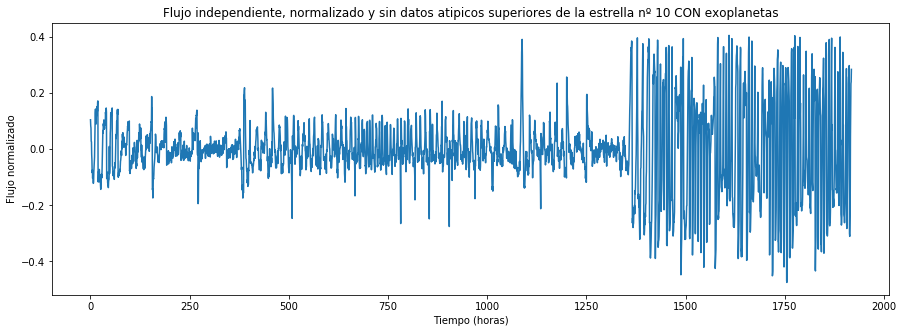

In [13]:
i = 9
#Se extraen los datos de las distintas mediciones de luz, eliminando la columna "LABEL"
flujo = kepler_train_data[kepler_train_data.LABEL == 2].drop('LABEL', axis = 1).iloc[i,:]
tiempo = np.arange(len(flujo)) * (36/60) #Variable "tiempo" en horas
plt.figure(figsize=(15, 5)) #Tamaño del gráfico
#Etiquetas
plt.title('Flujo independiente, normalizado y sin datos atipicos superiores de la estrella nº {} CON exoplanetas'.format(i+1))
plt.xlabel('Tiempo (horas)')
plt.ylabel('Flujo normalizado')
plt.plot(tiempo, flujo)

### Visualización de los datos
Así quedan los datos después del primer tratamiento
###### Datos de entrenamiento

In [14]:
pd.DataFrame(kepler_train_data)

LABEL    FLUX.1    FLUX.2    FLUX.3    FLUX.4    FLUX.5    FLUX.6  \
0         2  0.106403  0.100007  0.058134  0.027612  0.020326 -0.035103   
1         2  0.041485  0.050703  0.003597  0.037446 -0.037595 -0.026886   
2         2  0.036390  0.039271  0.018812  0.003153 -0.034190 -0.026011   
3         2  0.019349  0.081422 -0.052651 -0.065242 -0.006866 -0.021728   
4         2 -0.058758 -0.061891 -0.066326 -0.059138 -0.047121 -0.041884   
...     ...       ...       ...       ...       ...       ...       ...   
5082      1 -0.117483 -0.121318 -0.095393 -0.138459 -0.084585 -0.092969   
5083      1  0.234930  0.184672  0.197383  0.172634  0.128328  0.062953   
5084      1  0.018139  0.020752  0.012979  0.001144  0.024486  0.017697   
5085      1  0.007295  0.004060 -0.006046 -0.005157  0.003582 -0.000798   
5086      1  0.088057  0.075981  0.067276  0.064914  0.038915  0.018064   

        FLUX.7    FLUX.8    FLUX.9  ...  FLUX.3188  FLUX.3189  FLUX.3190  \
0    -0.040581 -0.013007 -0.000332  ...  -0.046745  -0.064083  -0.065208   
1    -0.054623 -0.054545 -0.054560  ...   0.007640  -0.047580  -0.048278   
2    -0.027999 -0.008730 -0.054926  ...  -0.035135   0.042446   0.042538   
3     0.007249 -0.024948 -0.020675  ...   0.038329   0.008620   0.007142   
4    -0.031973 -0.047753 -0.040327  ...  -0.038013   0.038773   0.036134   
...        ...       ...       ...  ...        ...        ...        ...   
5082 -0.117113 -0.073702 -0.047662  ...   0.173054   0.183409   0.199123   
5083  0.061642 -0.000242  0.028688  ...  -0.020932  -0.008683  -0.045467   
5084  0.013113  0.015868  0.009033  ...  -0.025123  -0.039117  -0.036668   
5085  0.008118  0.001014  0.007540  ...  -0.002071   0.003721   0.000187   
5086 -0.000705 -0.004434 -0.045276  ...   0.048138  -0.004316   0.036441   

      FLUX.3191  FLUX.3192  FLUX.3193  FLUX.3194  FLUX.3195  FLUX.3196  \
0      0.018642   0.033445   0.062076   0.026078   0.040409   0.002601   
1     -0.035134   0.002010   0.012103  -0.011757   0.022125   0.039876   
2      0.003252   0.011593   0.035374   0.020106   0.004589  -0.032843   
3      0.106338   0.075364  -0.022922  -0.012111  -0.038125  -0.038649   
4      0.052166   0.014349   0.014799   0.029481   0.034669   0.022747   
...         ...        ...        ...        ...        ...        ...   
5082   0.192721   0.191016   0.178887  -0.185485  -0.171749  -0.131207   
5083  -0.024357  -0.084661  -0.074632   0.017745   0.051021  -0.025521   
5084   0.003785  -0.004064  -0.014141   0.021003   0.032458   0.027609   
5085   0.001118  -0.008737   0.007012   0.001055  -0.017676  -0.002270   
5086  -0.005958  -0.008697  -0.023396  -0.035231  -0.016710  -0.014665   

      FLUX.3197  
0     -0.027266  
1      0.047170  
2     -0.057117  
3      0.054377  
4     -0.018448  
...         ...  
5082  -0.098733  
5083   0.017436  
5084   0.027751  
5085   0.005036  
5086   0.016758  

[5087 rows x 3198 columns]

###### Datos de test

In [15]:
pd.DataFrame(kepler_test_data)

LABEL    FLUX.1    FLUX.2    FLUX.3    FLUX.4    FLUX.5    FLUX.6  \
0        2  0.112855  0.193746  0.156624  0.053047  0.048003  0.031599   
1        2  0.040047  0.038188  0.041250  0.042059  0.043381  0.045242   
2        2  0.411868  0.346021  0.291078  0.248623  0.296998  0.187838   
3        2 -0.024040 -0.024718 -0.030960 -0.028750 -0.002513 -0.015710   
4        2 -0.012001 -0.001298  0.001697  0.002894 -0.001611 -0.005295   
..     ...       ...       ...       ...       ...       ...       ...   
565      1  0.076486  0.055972  0.054183  0.063447  0.027594  0.011578   
566      1  0.021322  0.032763  0.036279  0.033286  0.043332  0.008502   
567      1 -0.108557 -0.070560 -0.060486 -0.068568 -0.057884 -0.003740   
568      1  0.012061  0.010948  0.003639  0.003743  0.008203 -0.001205   
569      1  0.043405  0.036265  0.049002  0.038708  0.030668  0.019543   

       FLUX.7    FLUX.8    FLUX.9  ...  FLUX.3188  FLUX.3189  FLUX.3190  \
0   -0.023958 -0.053856 -0.052662  ...  -0.067410  -0.057586  -0.074380   
1    0.049985  0.051557  0.056664  ...   0.019506  -0.007610  -0.022940   
2    0.138318  0.068238 -0.093263  ...   0.052611  -0.027178  -0.019632   
3   -0.019292 -0.007635  0.001454  ...   0.067296   0.057038   0.055812   
4    0.005089 -0.015073  0.003032  ...   0.012573   0.001174   0.016360   
..        ...       ...       ...  ...        ...        ...        ...   
565  0.003751 -0.001835 -0.012910  ...   0.017186  -0.000666  -0.023871   
566  0.009654  0.023791  0.012153  ...  -0.013376   0.000730  -0.023240   
567 -0.031567 -0.010125  0.031219  ...  -0.004638  -0.008604   0.003615   
568 -0.003133  0.002375  0.000689  ...   0.000416   0.002235  -0.003381   
569  0.007517 -0.001485 -0.008744  ...   0.015355   0.021648   0.021738   

     FLUX.3191  FLUX.3192  FLUX.3193  FLUX.3194  FLUX.3195  FLUX.3196  \
0    -0.122173  -0.083266   0.003973  -0.035831  -0.026645  -0.035442   
1    -0.047497  -0.061285  -0.076296  -0.089310  -0.094969  -0.088326   
2    -0.030331  -0.053784  -0.161964  -0.064556  -0.143706   0.008512   
3     0.047441   0.028728   0.031292   0.030554  -0.012484  -0.054071   
4     0.018559   0.012398  -0.011373  -0.009959  -0.001402  -0.004917   
..         ...        ...        ...        ...        ...        ...   
565  -0.017585  -0.004103   0.002256  -0.027078  -0.017168  -0.013612   
566  -0.010162  -0.009859  -0.012586   0.008729   0.005471  -0.006030   
567  -0.021751  -0.049853  -0.070481  -0.020277   0.017580   0.052633   
568  -0.003657   0.004196  -0.002087  -0.007457  -0.001682  -0.001277   
569   0.034205   0.037386   0.039476  -0.023537  -0.027204  -0.018958   

     FLUX.3197  
0     0.032905  
1    -0.068139  
2     0.089997  
3    -0.041487  
4     0.018316  
..         ...  
565  -0.008324  
566  -0.006459  
567   0.069162  
568   0.003572  
569  -0.011295  

[570 rows x 3198 columns]

# *PCA*
Con los datos ya tratados, el siguiente paso es aplicar *PCA* para la reducción de dimensiones.

#### Instanciar y aplicar *PCA* en el *dataset* de entrenamiento

Filas y dimensiones finales: (5087, 603)
Suma de la varianza:  0.9001430541752459


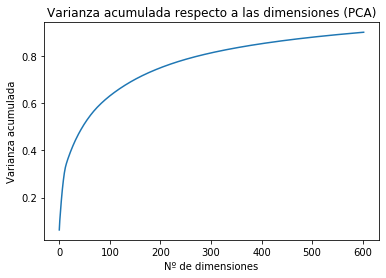

In [16]:
flujos = kepler_train_data.drop(['LABEL'], axis = 1) #Eliminar la columna etiqueta
pca = PCA(0.9) #Crear una instancia de PCA con las dimensiones necesarias para obtener 0.9 de varianza
pca.fit(flujos) #Ajustar el modelo con los datos (generar matriz de covarianza, autovectores, autovalores, etc.)
flujos_pca = pca.transform(flujos) #Aplicar la reducción de dimensiones

print("Filas y dimensiones finales:", flujos_pca.shape)
expl = pca.explained_variance_ratio_
print('Suma de la varianza: ', sum(expl))

#Visualizar el grafico de la varianza acumulada
plt.title('Varianza acumulada respecto a las dimensiones (PCA)')
plt.xlabel('Nº de dimensiones')
plt.ylabel('Varianza acumulada')
plt.plot(np.cumsum(pca.explained_variance_ratio_))

El resultado de *PCA* muestra que, para obtener una varianza acumulada de 0,9, son necesarias 603 dimensiones. El valor de estas dimensiones para cada estrella se cargan en "*flujos_pca*" ordenadas de mayor a menos varianza -es decir, de mayor a menor relevancia para el modelo-.

#### Crear el nuevo *dataset* de entrenamiento
Nuevo *dataset* que contiene únicamente las 603 dimensiones resultantes de aplicar *PCA*.

In [17]:
kepler_train_data_pca = pd.DataFrame(data = flujos_pca) #Crear dataset con los datos de 'flujos_pca' con los valores de las 603 dimensiones
kepler_train_data_pca

0         1         2         3         4         5         6    \
0     0.064657  0.096775 -0.025112 -0.065888 -0.005493 -0.128811  0.052731   
1     0.280902  0.051640  0.132471 -0.162766 -0.081271 -0.007710 -0.063518   
2    -0.095377  0.212582 -0.554484  0.243481  0.200693  0.329420 -0.143710   
3    -0.436844  0.222025 -0.404767  0.269585 -0.149680  0.317270 -0.205330   
4     0.156385  0.089766 -0.235699 -0.101338 -0.154256  0.326667 -0.209556   
...        ...       ...       ...       ...       ...       ...       ...   
5082 -3.936119  0.222828 -0.168616 -0.652407 -0.568182  2.094444 -0.296745   
5083 -0.091921  1.186475  1.311370  0.323385 -0.594974 -0.652316  0.471931   
5084  0.114565  0.210029  0.394792  0.090145  0.045819 -0.217128 -0.025548   
5085 -0.004102 -0.161846  0.041366  0.126275 -0.002037 -0.070416  0.018862   
5086  0.320166 -0.382206 -0.145770 -0.418198  0.047609 -0.114099  0.096102   

           7         8         9    ...       593       594       595  \
0     0.180928  0.435949 -0.350702  ...  0.156446 -0.122977  0.012988   
1     0.267813  0.160459 -0.067823  ... -0.049246  0.027473 -0.015339   
2     0.496918 -0.051265 -0.959701  ... -0.035973 -0.079473 -0.017117   
3     0.543809  0.133126 -0.506663  ...  0.027824  0.134666  0.093335   
4     0.383505 -0.040992 -0.478106  ... -0.085062 -0.021682  0.148226   
...        ...       ...       ...  ...       ...       ...       ...   
5082 -1.226294  0.457405  0.347252  ... -0.018309 -0.020405  0.010741   
5083  1.509093  1.447173  0.929856  ... -0.057525 -0.026347  0.062468   
5084  0.043999 -0.194226 -0.088254  ... -0.017591 -0.008258 -0.022283   
5085  0.026613  0.005338  0.003834  ...  0.000200 -0.006178 -0.011159   
5086 -0.066002  0.185191 -0.290908  ... -0.039376 -0.036341  0.007666   

           596       597       598       599       600       601       602  
0    -0.016150 -0.153618 -0.018907  0.000045 -0.057146 -0.007258  0.021993  
1    -0.100788  0.014846  0.051353 -0.040544 -0.033794 -0.004559  0.132357  
2    -0.107141  0.103257 -0.003246  0.100657  0.103516 -0.021492 -0.089290  
3     0.015113 -0.104497  0.140892 -0.123511 -0.084596 -0.027630 -0.125627  
4     0.113885  0.166970  0.031739  0.082830 -0.100400  0.113083  0.009205  
...        ...       ...       ...       ...       ...       ...       ...  
5082 -0.061041 -0.020155 -0.026920 -0.073979  0.066780  0.023091 -0.032884  
5083  0.035424  0.009845 -0.004290  0.036974  0.039621 -0.012367 -0.031708  
5084 -0.008808  0.013437  0.014521  0.013996 -0.002984 -0.013145  0.012657  
5085 -0.009062 -0.010222 -0.000986  0.005668  0.002577 -0.005036 -0.001129  
5086 -0.018523  0.005245  0.026081  0.028706  0.058605  0.002981  0.028150  

[5087 rows x 603 columns]

#### Adaptar el nuevo *dataset* de entrenaminto
Dar el mismo formato a este nuevo *dataset* para que se asemeje al original. Esto consiste en renombrar las columnas a '*FLUX.n*' y añadir la columna '*LABEL*' con los mismos valores del *dataset* original.

In [18]:
label = [] #Crear la lista en la que se cargaran los valores de la columna 'LABEL'
for i in range(len(kepler_train_data_pca.columns)):
    kepler_train_data_pca=kepler_train_data_pca.rename({i: 'FLUX.{}'.format(i+1)}, axis = 1) #Renombrar la i-esima columna
    
for i in range(len(kepler_train_data)):
    label.append(int(kepler_train_data.iloc[i]['LABEL'])) #Añadir el valor i-esimo de la columna 'LABEL' a la lista
    
kepler_train_data_pca.insert(0, 'LABEL', label, True) #Insertar en el nuevo dataset de entrenamiento la columna 'LABEL' con sus valores correspondientes
kepler_train_data_pca

LABEL    FLUX.1    FLUX.2    FLUX.3    FLUX.4    FLUX.5    FLUX.6  \
0         2  0.064657  0.096775 -0.025112 -0.065888 -0.005493 -0.128811   
1         2  0.280902  0.051640  0.132471 -0.162766 -0.081271 -0.007710   
2         2 -0.095377  0.212582 -0.554484  0.243481  0.200693  0.329420   
3         2 -0.436844  0.222025 -0.404767  0.269585 -0.149680  0.317270   
4         2  0.156385  0.089766 -0.235699 -0.101338 -0.154256  0.326667   
...     ...       ...       ...       ...       ...       ...       ...   
5082      1 -3.936119  0.222828 -0.168616 -0.652407 -0.568182  2.094444   
5083      1 -0.091921  1.186475  1.311370  0.323385 -0.594974 -0.652316   
5084      1  0.114565  0.210029  0.394792  0.090145  0.045819 -0.217128   
5085      1 -0.004102 -0.161846  0.041366  0.126275 -0.002037 -0.070416   
5086      1  0.320166 -0.382206 -0.145770 -0.418198  0.047609 -0.114099   

        FLUX.7    FLUX.8    FLUX.9  ...  FLUX.594  FLUX.595  FLUX.596  \
0     0.052731  0.180928  0.435949  ...  0.156446 -0.122977  0.012988   
1    -0.063518  0.267813  0.160459  ... -0.049246  0.027473 -0.015339   
2    -0.143710  0.496918 -0.051265  ... -0.035973 -0.079473 -0.017117   
3    -0.205330  0.543809  0.133126  ...  0.027824  0.134666  0.093335   
4    -0.209556  0.383505 -0.040992  ... -0.085062 -0.021682  0.148226   
...        ...       ...       ...  ...       ...       ...       ...   
5082 -0.296745 -1.226294  0.457405  ... -0.018309 -0.020405  0.010741   
5083  0.471931  1.509093  1.447173  ... -0.057525 -0.026347  0.062468   
5084 -0.025548  0.043999 -0.194226  ... -0.017591 -0.008258 -0.022283   
5085  0.018862  0.026613  0.005338  ...  0.000200 -0.006178 -0.011159   
5086  0.096102 -0.066002  0.185191  ... -0.039376 -0.036341  0.007666   

      FLUX.597  FLUX.598  FLUX.599  FLUX.600  FLUX.601  FLUX.602  FLUX.603  
0    -0.016150 -0.153618 -0.018907  0.000045 -0.057146 -0.007258  0.021993  
1    -0.100788  0.014846  0.051353 -0.040544 -0.033794 -0.004559  0.132357  
2    -0.107141  0.103257 -0.003246  0.100657  0.103516 -0.021492 -0.089290  
3     0.015113 -0.104497  0.140892 -0.123511 -0.084596 -0.027630 -0.125627  
4     0.113885  0.166970  0.031739  0.082830 -0.100400  0.113083  0.009205  
...        ...       ...       ...       ...       ...       ...       ...  
5082 -0.061041 -0.020155 -0.026920 -0.073979  0.066780  0.023091 -0.032884  
5083  0.035424  0.009845 -0.004290  0.036974  0.039621 -0.012367 -0.031708  
5084 -0.008808  0.013437  0.014521  0.013996 -0.002984 -0.013145  0.012657  
5085 -0.009062 -0.010222 -0.000986  0.005668  0.002577 -0.005036 -0.001129  
5086 -0.018523  0.005245  0.026081  0.028706  0.058605  0.002981  0.028150  

[5087 rows x 604 columns]

Arriba se muestra el nuevo *dataset* de entrenamiento con las 603 dimensiones.

### Aplicar al *dataset* de test
Se aplica la misma función de *PCA* creada con los datos de entrenamiento para seleccionar las mismas dimensiones de los datos de test. Es importante seleccionar las mismas para que el modelo final evalúe los datos de test con las mismas dimensiones que tienen los datos con los que ha sido entrenado.

In [19]:
flujos_test = kepler_test_data.drop(['LABEL'], axis = 1) #Eliminar la columna etiqueta
flujos_test_pca = pca.transform(flujos_test) #Aplicar la reducción de dimensiones con la misma instancia de PCA creada con los datos de entrenamiento

kepler_test_data_pca = pd.DataFrame(data = flujos_test_pca) #Crear dataset con los datos de 'flujos_test_pca' con los valores de las 603 dimensiones

label = [] #Crear la lista en la que se cargaran los valores de la columna 'LABEL'
for i in range(len(kepler_test_data_pca.columns)):
    kepler_test_data_pca=kepler_test_data_pca.rename({i: 'FLUX.{}'.format(i+1)}, axis = 1) #Renombrar la i-esima columna
    
for i in range(len(kepler_test_data)):
    label.append(int(kepler_test_data.iloc[i]['LABEL'])) #Añadir el valor i-esimo de la columna 'LABEL' a la lista
    
kepler_test_data_pca.insert(0, 'LABEL', label, True) #Insertar en el nuevo dataset de test la columna 'LABEL' con sus valores correspondientes
kepler_test_data_pca

LABEL    FLUX.1    FLUX.2    FLUX.3    FLUX.4    FLUX.5    FLUX.6  \
0        2  0.065266  0.076898  0.022723 -0.027709 -0.038500  0.102257   
1        2  0.155799 -0.156272  0.102767 -0.051380  0.070768 -0.279328   
2        2  0.193657 -0.242835  0.305769 -0.117894  0.017249  0.184005   
3        2 -0.084775 -0.030296  0.263216 -0.128419  0.239384 -0.133651   
4        2  0.065127  0.003941  0.103341  0.036462 -0.062291 -0.056169   
..     ...       ...       ...       ...       ...       ...       ...   
565      1  0.008058  0.151563 -0.142312 -0.137301  0.111794 -0.087730   
566      1  0.210141 -0.068512  0.230793  0.139451  0.213961  0.026154   
567      1 -0.677434  0.127153  0.223530  0.122579  0.033687  0.344718   
568      1  0.252398  0.089392 -0.025415 -0.292439 -0.096788  0.326310   
569      1  0.334009 -0.288403 -0.388990 -0.122355 -0.065389  0.122939   

       FLUX.7    FLUX.8    FLUX.9  ...  FLUX.594  FLUX.595  FLUX.596  \
0   -0.000655  0.280757  0.100139  ... -0.013640 -0.014275  0.056287   
1   -0.041953 -0.151652  0.088318  ... -0.021398  0.074067  0.146010   
2    0.201150  0.078778  0.140655  ...  0.160503 -0.017088  0.011963   
3   -0.265096 -0.098542  0.307245  ... -0.211180  0.086391 -0.108341   
4   -0.046053  0.203867  0.065525  ...  0.037258  0.064303 -0.152809   
..        ...       ...       ...  ...       ...       ...       ...   
565  0.544112  0.397374 -0.497785  ... -0.059945  0.011310 -0.033225   
566  0.147719 -0.190076 -0.383555  ... -0.008802  0.004619  0.006546   
567 -0.636733 -0.193548 -0.258463  ... -0.019171 -0.062073  0.043833   
568  0.065421  0.158569 -0.276049  ...  0.000961 -0.042487  0.000818   
569  0.088800 -0.144729  0.072246  ... -0.020218  0.000413  0.006912   

     FLUX.597  FLUX.598  FLUX.599  FLUX.600  FLUX.601  FLUX.602  FLUX.603  
0   -0.045496  0.028234  0.002488  0.021415 -0.006707 -0.060595  0.097540  
1   -0.132154  0.042687 -0.024376  0.083098  0.056194 -0.080471  0.034872  
2   -0.003953  0.189178  0.066011 -0.044400 -0.096529  0.129389  0.095031  
3    0.139958  0.043159 -0.040881  0.075007  0.158291 -0.028421 -0.089368  
4    0.020558 -0.042411 -0.012089  0.017415 -0.177694  0.030252 -0.060349  
..        ...       ...       ...       ...       ...       ...       ...  
565 -0.015749  0.001754  0.012215 -0.026498 -0.025677  0.005097  0.004364  
566  0.012664 -0.009514  0.002705  0.003258 -0.011407  0.010395 -0.014492  
567  0.043169  0.011589  0.073481  0.016611 -0.008476 -0.017247 -0.000993  
568 -0.030296  0.004302  0.009921 -0.014776  0.006261  0.009633 -0.023305  
569 -0.030725 -0.017228  0.023735  0.011159  0.017743  0.007182  0.016577  

[570 rows x 604 columns]

Así queda el flujo de la estrella nº 10 CON exoplanetas -del *dataset* de entrenamiento- con las 603 dimensiones seleccionadas por *PCA*.

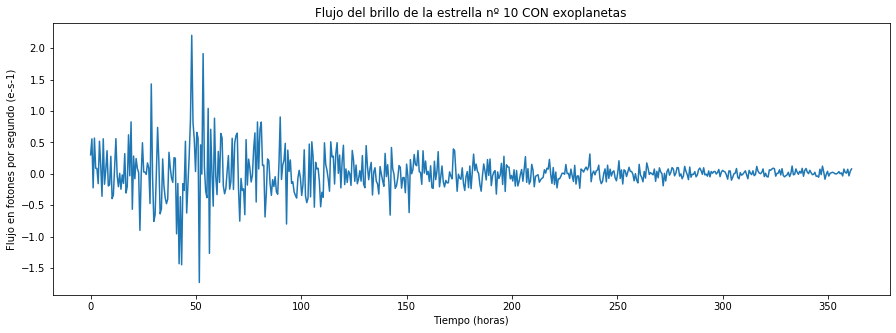

In [20]:
i = 9
#Se extraen los datos de las distintas mediciones de luz, eliminando la columna "LABEL"
flujo = kepler_train_data_pca[kepler_train_data_pca.LABEL == 2].drop('LABEL', axis = 1).iloc[i,:]
tiempo = np.arange(len(flujo)) * (36/60) #Variable "tiempo" en horas
plt.figure(figsize=(15, 5)) #Tamaño del gráfico
plt.title('Flujo del brillo de la estrella nº {} CON exoplanetas'.format(i+1))
plt.xlabel('Tiempo (horas)')
plt.ylabel('Flujo en fotones por segundo (e-s-1)')
plt.plot(tiempo, flujo)

# *Data augmentation*
Para balancear el *dataset* de entrenamiento mediante este método, es necesario conocer las características de los datos que van a ser replicados y alterados.
Estos datos son los correspondientes a las estrellas con exoplanetas confirmados -*LABEL* = 2-, que son 37 de las 5.087 totales -alrededor del 0,7%-. Por ello, es necesario obtener unos 15 nuevos registros por cada uno de los 37 existentes para lograr un mayor balanceamiento, cercano al 10%.

Estos son los flujos de las 37 estrellas con exoplanetas que deben ser replicados:

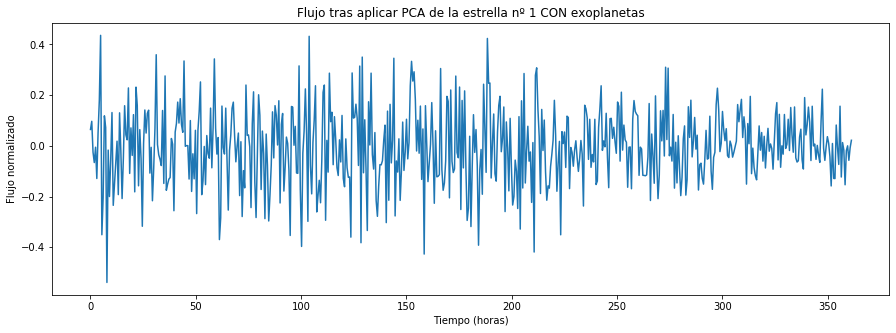

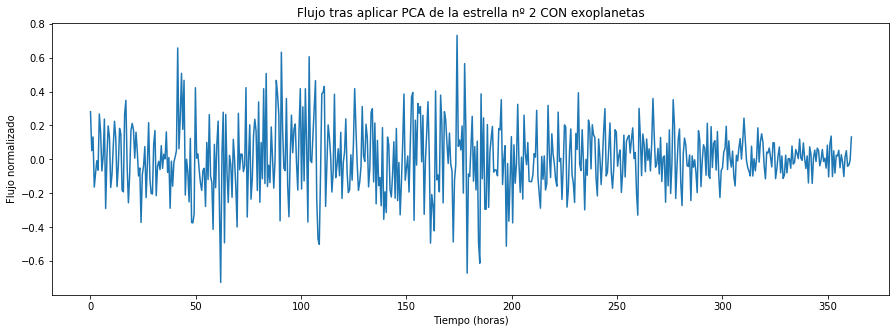

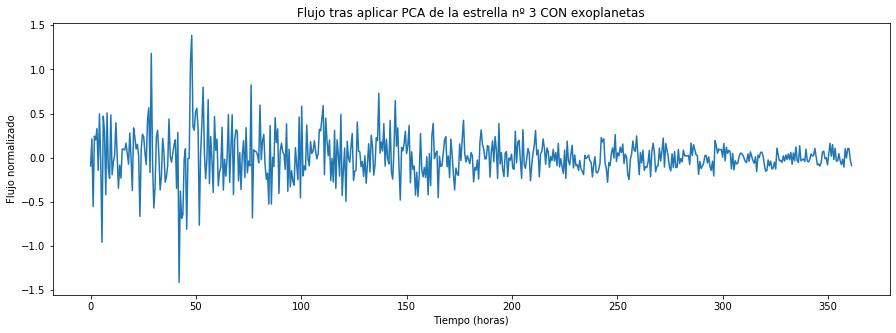

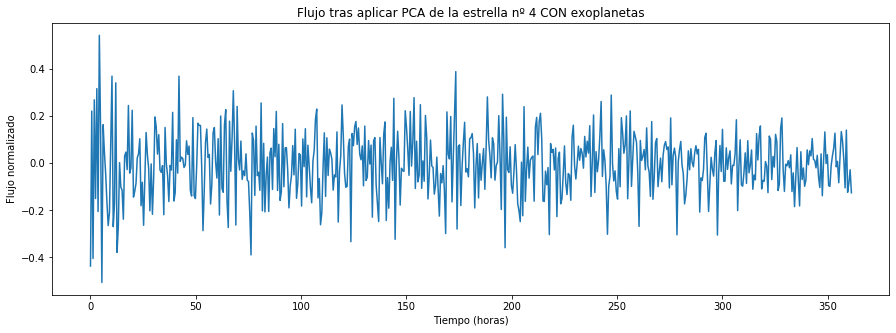

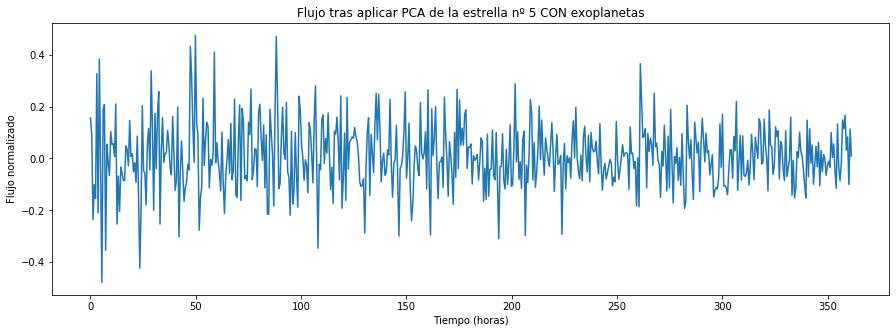

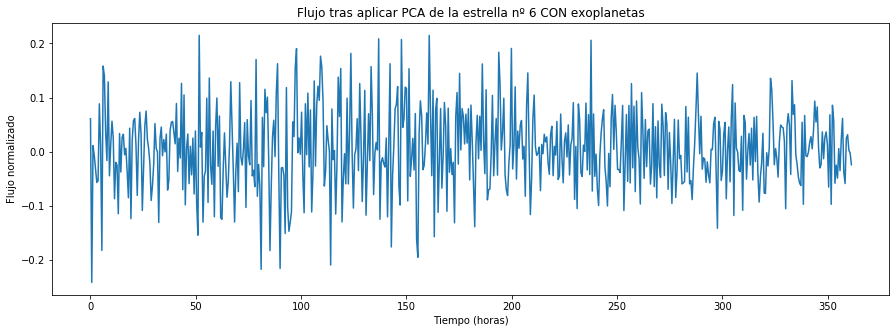

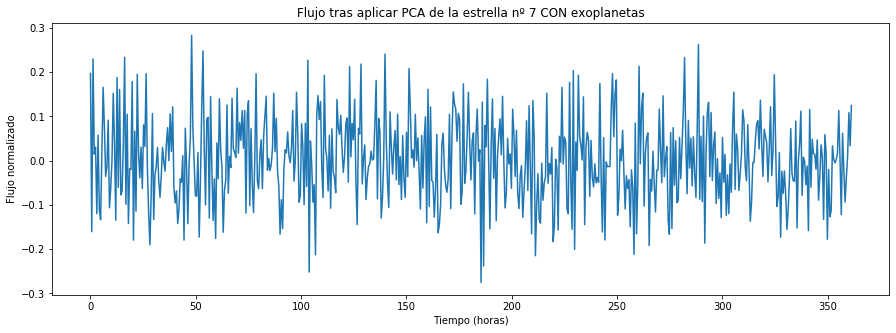

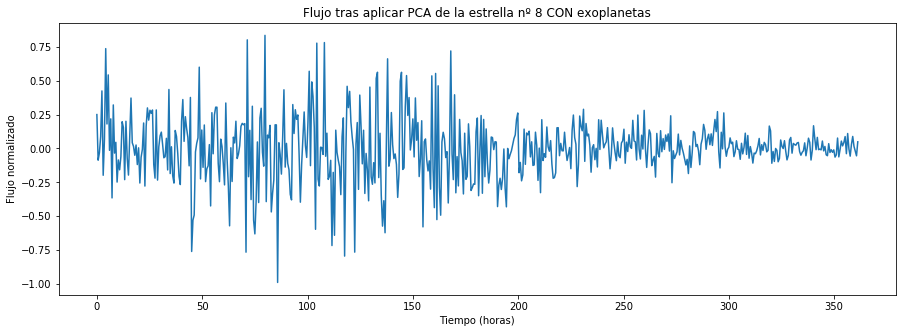

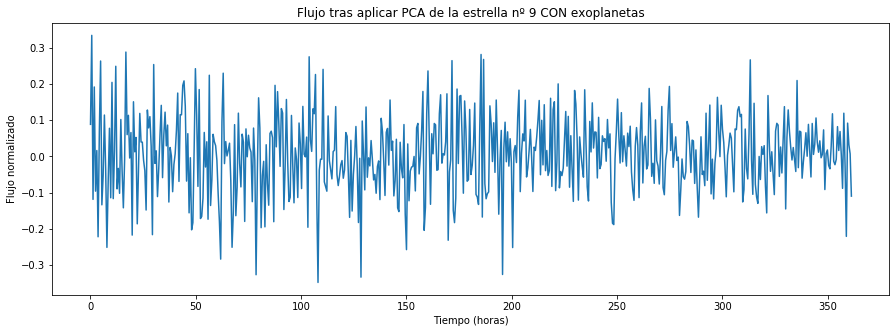

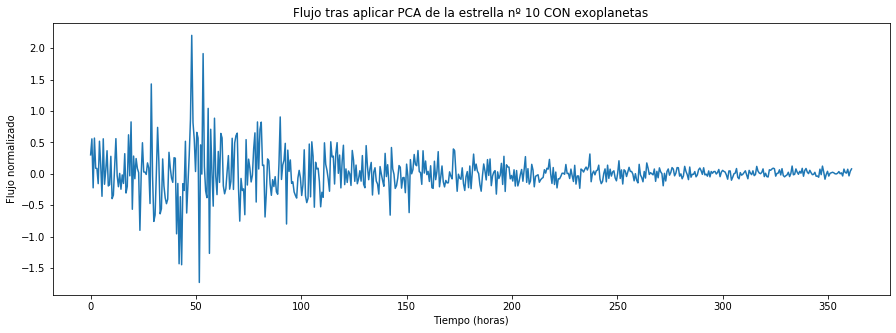

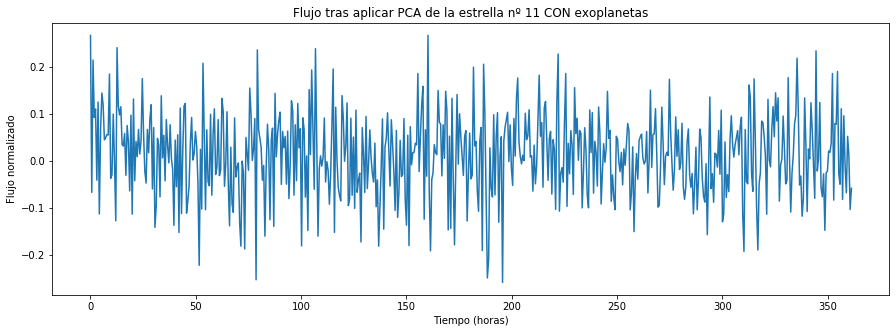

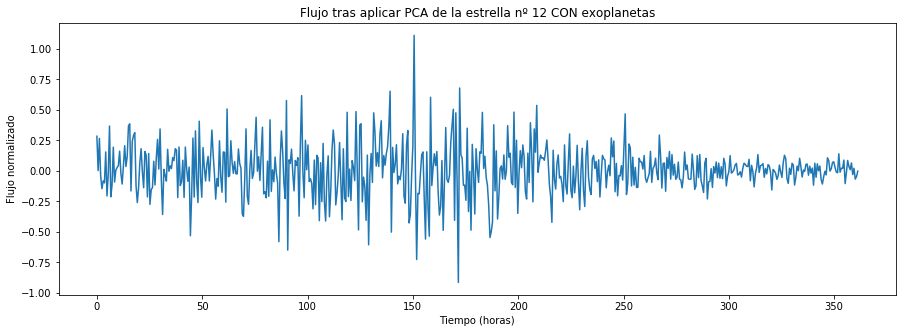

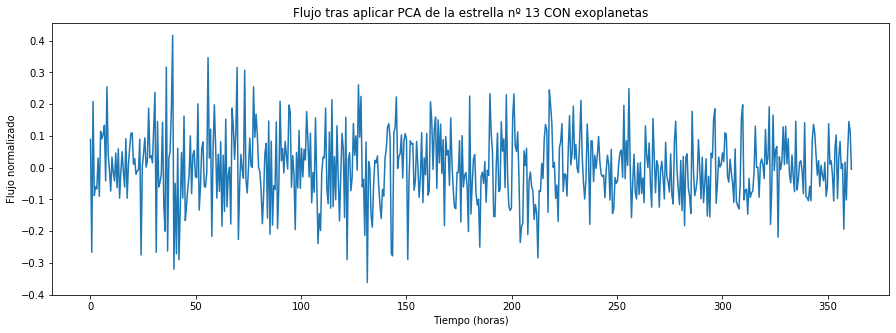

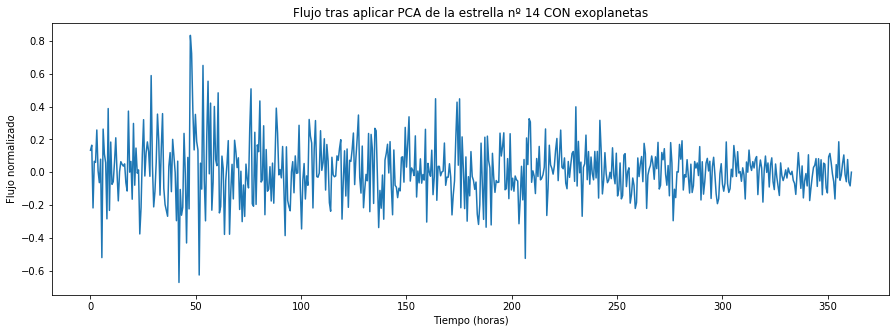

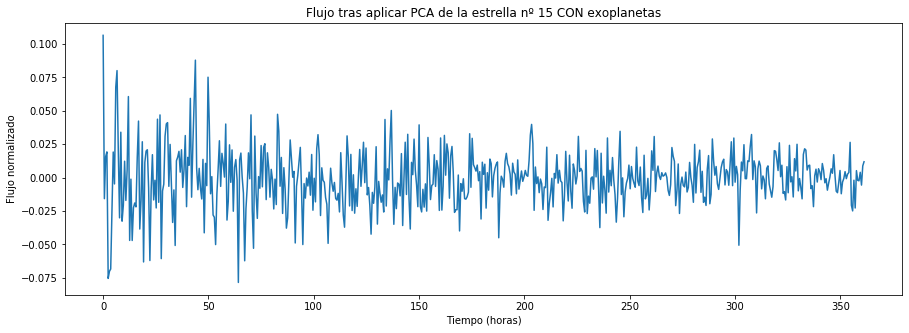

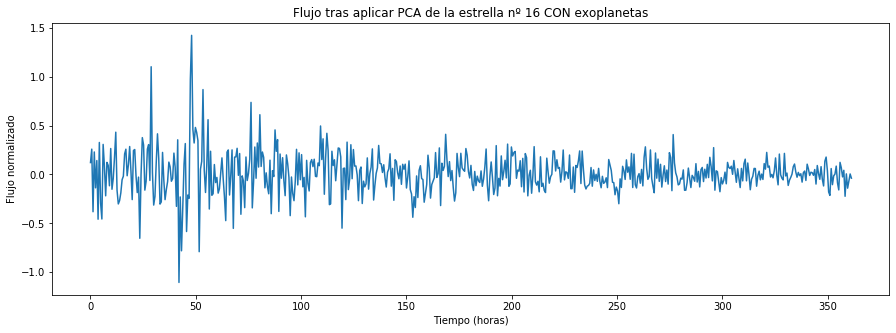

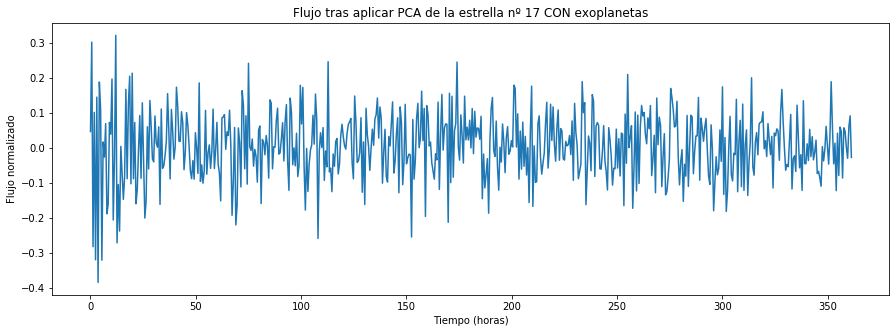

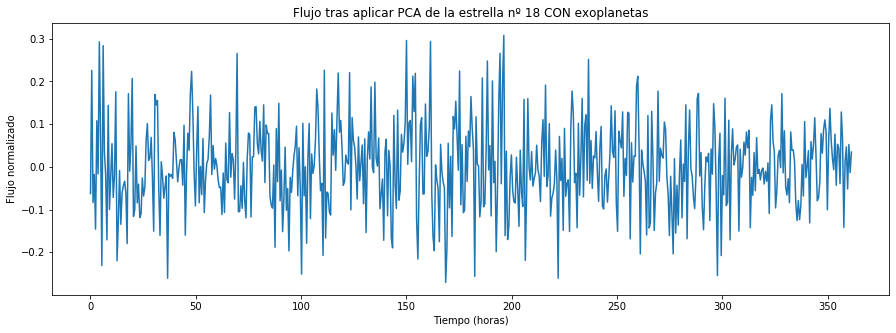

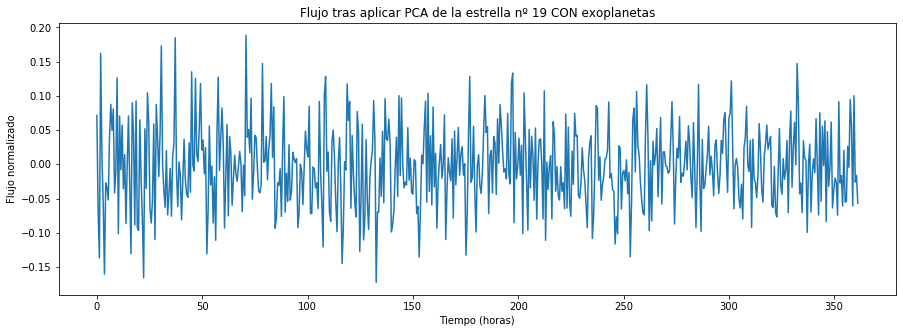

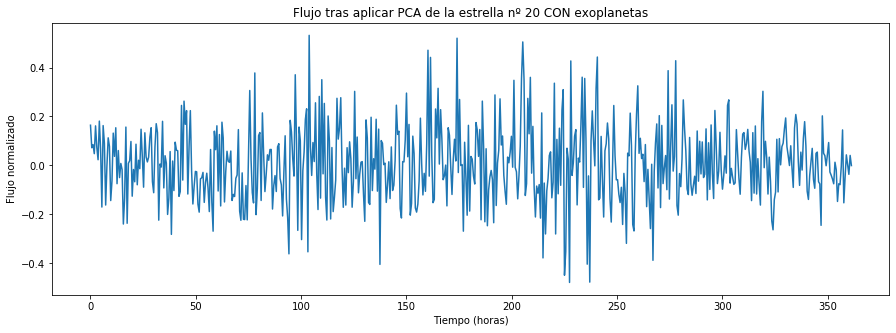

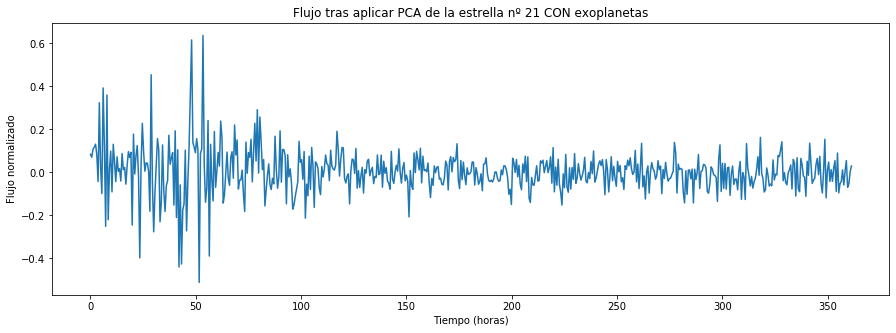

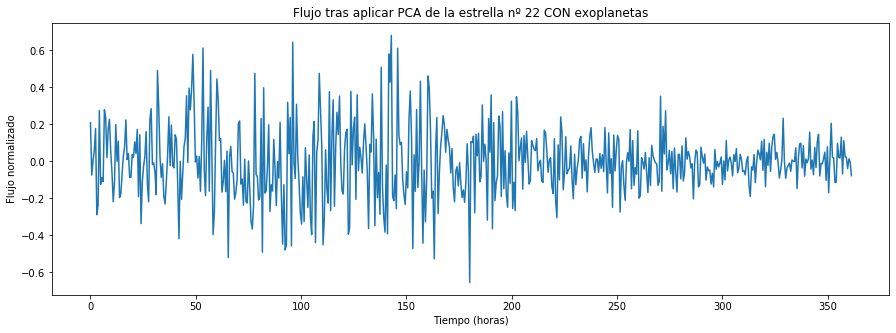

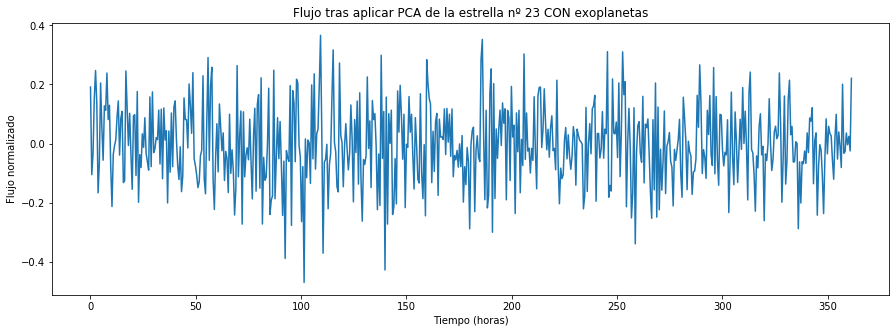

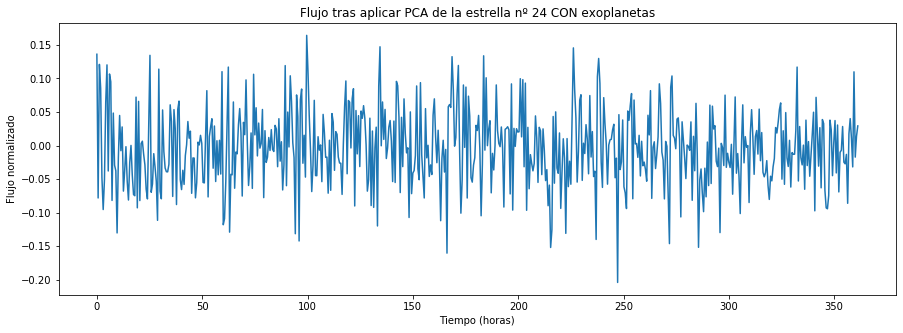

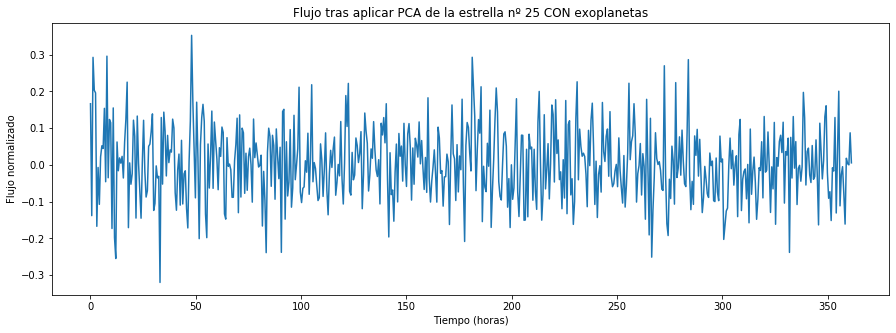

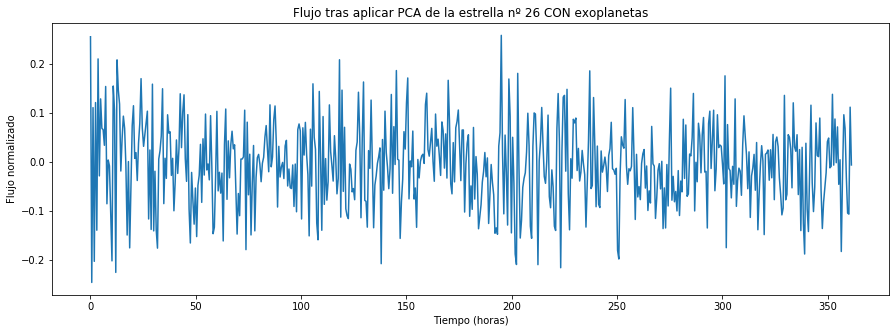

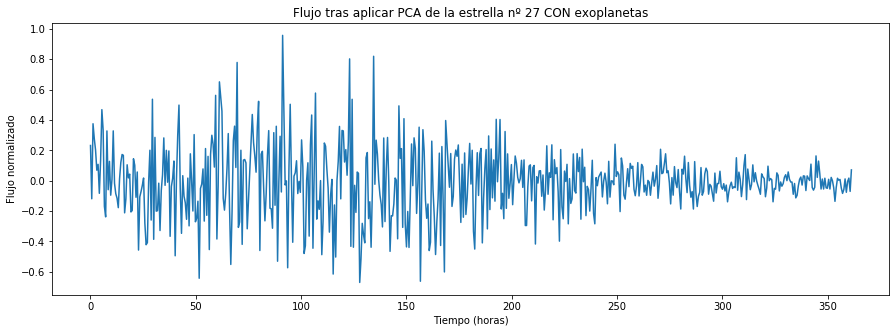

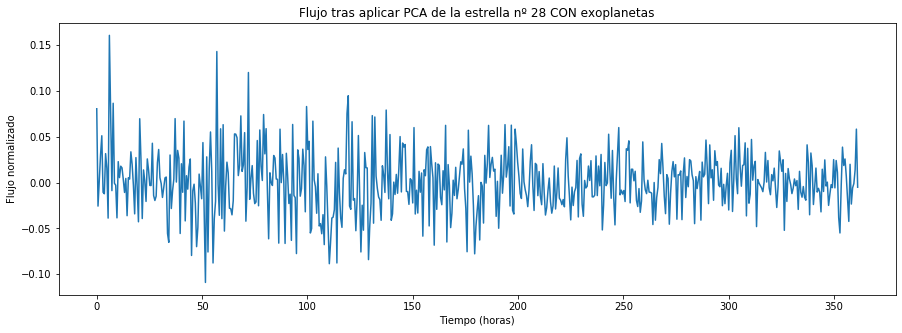

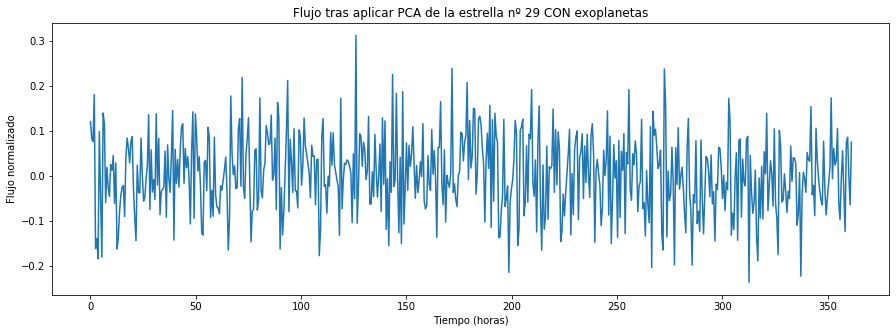

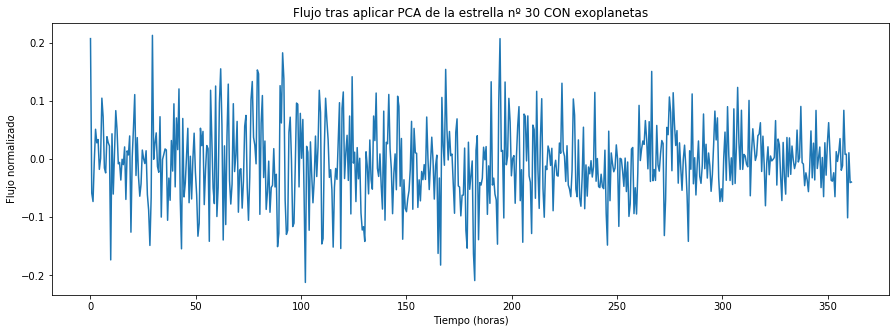

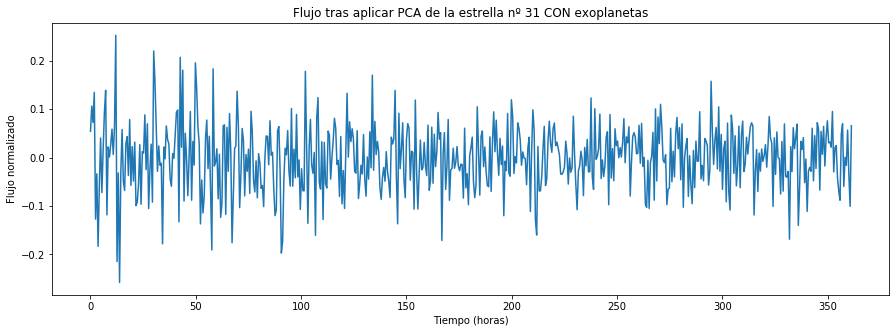

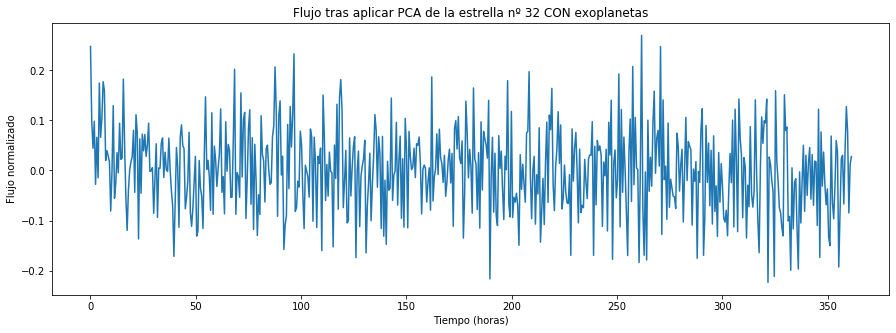

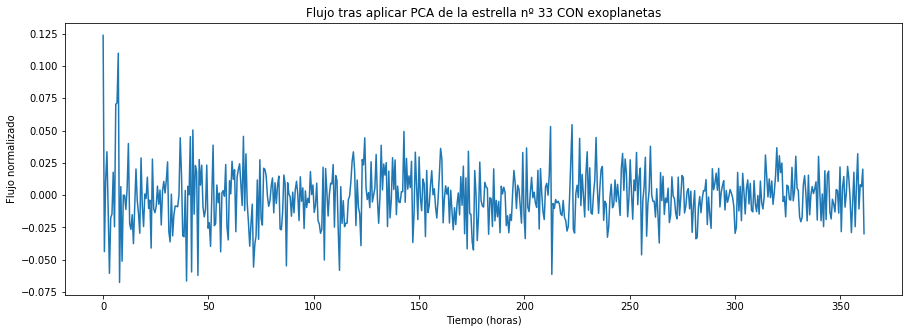

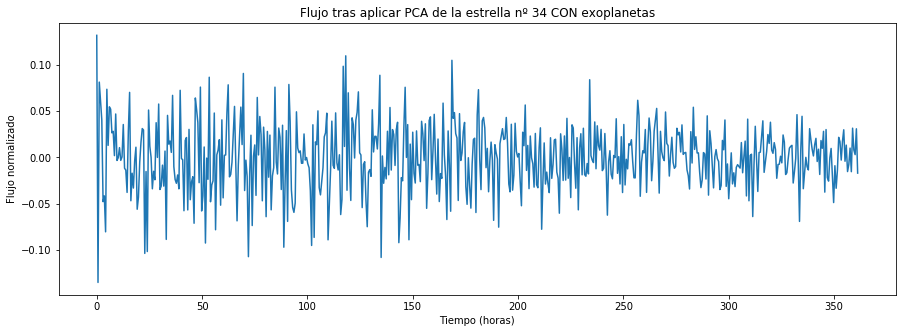

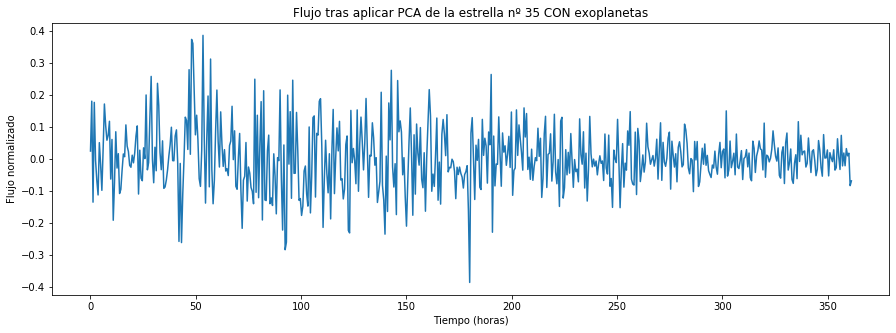

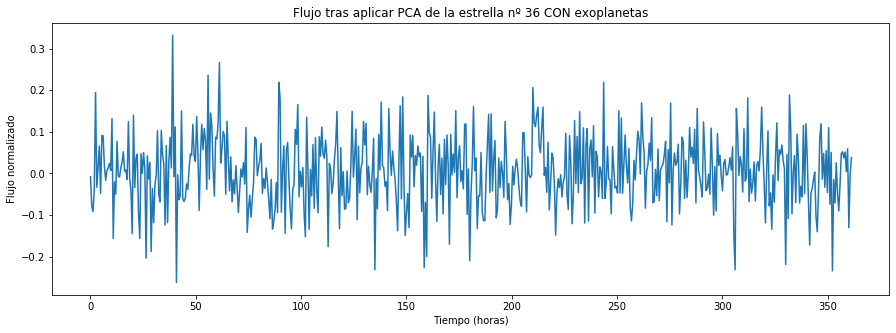

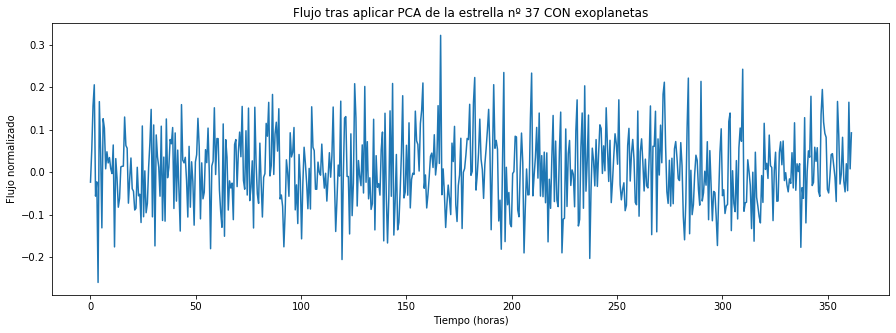

In [21]:
for i in range(len(kepler_train_data_pca[kepler_train_data_pca.LABEL == 2])):
    #Se extraen los datos de las distintas mediciones de luz, eliminando la columna "LABEL"
    flujo = kepler_train_data_pca[kepler_train_data_pca.LABEL == 2].drop('LABEL', axis = 1).iloc[i,:]
    tiempo = np.arange(len(flujo)) * (36/60) #Variable "tiempo" en horas
    plt.figure(figsize=(15, 5)) #Tamaño del gráfico
    plt.title('Flujo tras aplicar PCA de la estrella nº {} CON exoplanetas'.format(i+1))
    plt.xlabel('Tiempo (horas)')
    plt.ylabel('Flujo normalizado')
    plt.plot(tiempo, flujo)
    plt.rcParams.update({'figure.max_open_warning': 0})

El objetivo es analizar cómo replicar estos datos y alterarlos de tal forma que no se pierda la información esencial que hace que sean detectados como exoplanetas.

Tras aplicar *PCA*, las dimensiones se encuentran ordenadas según su relevancia para el modelo, por lo que alterar su orden implicaría esa pérdida de información, además de que las curvas de luz se preducen con ciertos patrones que, de verse alterados, modificarían por completo la naturaleza de los datos. Por lo tanto, alterar el orden de las columnas no se presenta como una opción.

Las dos mejores opciones, dados los datos, son:
- Incremento y decremento de una magnitud de los datos
- Aplicación de ruido a todos los datos

## Incremento y decremento de magnitudes

Las magnitudes que se van a aplicar a los datos son: 0.02, 0.04, 0.06, 0.08 y 0.1.

De esta forma, los datos de estrellas con exoplanetas resultantes serán 407 en total

##### Estos son los datos que se van a replicar con los incrementos y decrementos

In [22]:
flujos_exo = kepler_train_data_pca[kepler_train_data_pca.LABEL == 2].drop(['LABEL'], axis = 1) #Eliminar la columna etiqueta y cargar los flujos de las estrellas con exoplanetas
flujos_exo

FLUX.1    FLUX.2    FLUX.3    FLUX.4    FLUX.5    FLUX.6    FLUX.7  \
0   0.064657  0.096775 -0.025112 -0.065888 -0.005493 -0.128811  0.052731   
1   0.280902  0.051640  0.132471 -0.162766 -0.081271 -0.007710 -0.063518   
2  -0.095377  0.212582 -0.554484  0.243481  0.200693  0.329420 -0.143710   
3  -0.436844  0.222025 -0.404767  0.269585 -0.149680  0.317270 -0.205330   
4   0.156385  0.089766 -0.235699 -0.101338 -0.154256  0.326667 -0.209556   
5   0.061140 -0.240865  0.011431 -0.007067 -0.031689 -0.056541 -0.053235   
6   0.197293 -0.160313  0.230235  0.015163  0.030869 -0.119705  0.058090   
7   0.249868 -0.086585 -0.032370  0.087560  0.424559 -0.197987  0.067836   
8   0.088768  0.334573 -0.118508  0.191989 -0.095794  0.016415 -0.221840   
9   0.301405  0.555590 -0.223318  0.568477  0.088745  0.084723 -0.156697   
10  0.266852 -0.067526  0.214391  0.092154  0.110190 -0.041592  0.125091   
11  0.284686  0.003130  0.267013 -0.039450 -0.145251 -0.081310 -0.097526   
12  0.089583 -0.266112  0.208647 -0.087560 -0.060132 -0.066580  0.030227   
13  0.133818  0.164683 -0.217678  0.066353  0.059936  0.257396  0.008733   
14  0.106546 -0.015737  0.015775  0.019291 -0.075444 -0.070158 -0.068381   
15  0.122226  0.259618 -0.381242  0.230716 -0.136526  0.142821 -0.457773   
16  0.046697  0.301551 -0.281571  0.101372 -0.318933  0.144780 -0.383551   
17 -0.062804  0.225816 -0.083565 -0.017691 -0.145945  0.107940 -0.016525   
18  0.071252 -0.068770 -0.136778  0.161818  0.010730 -0.054391 -0.160407   
19  0.164294  0.072392  0.085188  0.048140  0.161650  0.073306  0.023376   
20  0.083936  0.070635  0.108439  0.117677  0.131183  0.082125 -0.042198   
21  0.208668 -0.073942  0.002424  0.059735  0.178019 -0.287884 -0.239169   
22  0.191196 -0.105330 -0.035102  0.151725  0.247035  0.133942 -0.167036   
23  0.135983 -0.078153  0.120900  0.085201 -0.047598 -0.095387 -0.051119   
24  0.166286 -0.137955  0.292426  0.202830  0.195781 -0.167012 -0.006981   
25  0.255150 -0.245629  0.110702 -0.202621  0.121012 -0.139176  0.209981   
26  0.231915 -0.118782  0.375190  0.277594  0.202669  0.069359  0.107793   
27  0.080522 -0.025662  0.001143  0.029867  0.051088 -0.010605 -0.012177   
28  0.120385  0.082462  0.076401  0.180972 -0.162037 -0.139504 -0.184744   
29  0.207366 -0.058673 -0.072995 -0.004095  0.051369  0.028015  0.033668   
30  0.054117  0.106207  0.072326  0.134578 -0.126938 -0.033638 -0.183282   
31  0.247725  0.098341  0.044400  0.098426 -0.027612  0.066300 -0.014687   
32  0.123771 -0.043831  0.011647  0.033579 -0.011514 -0.060634 -0.017527   
33  0.132017 -0.135424  0.081418  0.060945  0.040443 -0.047977 -0.041756   
34  0.024471  0.180167 -0.135157  0.176437 -0.004657 -0.066792 -0.112622   
35 -0.008267 -0.079213 -0.091846 -0.037482  0.194317 -0.033444  0.013973   
36 -0.023589  0.051946  0.155949  0.205879 -0.056546 -0.022957 -0.260034   

      FLUX.8    FLUX.9   FLUX.10  ...  FLUX.594  FLUX.595  FLUX.596  FLUX.597  \
0   0.180928  0.435949 -0.350702  ...  0.156446 -0.122977  0.012988 -0.016150   
1   0.267813  0.160459 -0.067823  ... -0.049246  0.027473 -0.015339 -0.100788   
2   0.496918 -0.051265 -0.959701  ... -0.035973 -0.079473 -0.017117 -0.107141   
3   0.543809  0.133126 -0.506663  ...  0.027824  0.134666  0.093335  0.015113   
4   0.383505 -0.040992 -0.478106  ... -0.085062 -0.021682  0.148226  0.113885   
5   0.088628  0.011557 -0.181824  ... -0.034727  0.023627  0.061771 -0.038008   
6  -0.110619 -0.133240  0.013793  ...  0.002558 -0.122007  0.062334 -0.020073   
7   0.736586  0.180545  0.542623  ... -0.038552  0.110190 -0.004242 -0.056787   
8   0.068177  0.263669 -0.133538  ...  0.069015  0.004846 -0.088068  0.119518   
9   0.518190  0.135297 -0.358419  ...  0.001024  0.014899 -0.034593  0.074654   
10 -0.113500  0.066755  0.144230  ... -0.050205  0.110729 -0.082573  0.095700   
11  0.156078 -0.205338 -0.025936  ... -0.014134  0.086126  0.037279  0.010211   
12 -0.089914  0.114521  0.091029  ...  0.082908 -0.002691  0.011

##### Datos finales con los incrementos y decrementos

In [23]:
flujos_exo_incrdecr = pd.DataFrame(flujos_exo) #Crear nuevo DataFrame para todos los datos resultantes de este metodo
#Incrementos
flujos_exo_incrdecr = flujos_exo_incrdecr.append((flujos_exo + 0.02), ignore_index = True)
flujos_exo_incrdecr = flujos_exo_incrdecr.append((flujos_exo + 0.04), ignore_index = True)
flujos_exo_incrdecr = flujos_exo_incrdecr.append((flujos_exo + 0.06), ignore_index = True)
flujos_exo_incrdecr = flujos_exo_incrdecr.append((flujos_exo + 0.08), ignore_index = True)
flujos_exo_incrdecr = flujos_exo_incrdecr.append((flujos_exo + 0.1), ignore_index = True)
#Decremento
flujos_exo_incrdecr = flujos_exo_incrdecr.append((flujos_exo - 0.02), ignore_index = True)
flujos_exo_incrdecr = flujos_exo_incrdecr.append((flujos_exo - 0.04), ignore_index = True)
flujos_exo_incrdecr = flujos_exo_incrdecr.append((flujos_exo - 0.06), ignore_index = True)
flujos_exo_incrdecr = flujos_exo_incrdecr.append((flujos_exo - 0.08), ignore_index = True)
flujos_exo_incrdecr = flujos_exo_incrdecr.append((flujos_exo - 0.1), ignore_index = True)
flujos_exo_incrdecr

FLUX.1    FLUX.2    FLUX.3    FLUX.4    FLUX.5    FLUX.6    FLUX.7  \
0    0.064657  0.096775 -0.025112 -0.065888 -0.005493 -0.128811  0.052731   
1    0.280902  0.051640  0.132471 -0.162766 -0.081271 -0.007710 -0.063518   
2   -0.095377  0.212582 -0.554484  0.243481  0.200693  0.329420 -0.143710   
3   -0.436844  0.222025 -0.404767  0.269585 -0.149680  0.317270 -0.205330   
4    0.156385  0.089766 -0.235699 -0.101338 -0.154256  0.326667 -0.209556   
..        ...       ...       ...       ...       ...       ...       ...   
402  0.023771 -0.143831 -0.088353 -0.066421 -0.111514 -0.160634 -0.117527   
403  0.032017 -0.235424 -0.018582 -0.039055 -0.059557 -0.147977 -0.141756   
404 -0.075529  0.080167 -0.235157  0.076437 -0.104657 -0.166792 -0.212622   
405 -0.108267 -0.179213 -0.191846 -0.137482  0.094317 -0.133444 -0.086027   
406 -0.123589 -0.048054  0.055949  0.105879 -0.156546 -0.122957 -0.360034   

       FLUX.8    FLUX.9   FLUX.10  ...  FLUX.594  FLUX.595  FLUX.596  \
0    0.180928  0.435949 -0.350702  ...  0.156446 -0.122977  0.012988   
1    0.267813  0.160459 -0.067823  ... -0.049246  0.027473 -0.015339   
2    0.496918 -0.051265 -0.959701  ... -0.035973 -0.079473 -0.017117   
3    0.543809  0.133126 -0.506663  ...  0.027824  0.134666  0.093335   
4    0.383505 -0.040992 -0.478106  ... -0.085062 -0.021682  0.148226   
..        ...       ...       ...  ...       ...       ...       ...   
402 -0.114784 -0.082334 -0.124588  ... -0.106219 -0.082267 -0.124514   
403 -0.180637 -0.026327 -0.087050  ... -0.086796 -0.115406 -0.107824   
404 -0.049300 -0.117005 -0.198211  ... -0.133038 -0.026540 -0.121873   
405 -0.034136 -0.148314 -0.009099  ... -0.127094 -0.052133 -0.048171   
406  0.066154 -0.046734 -0.231379  ... -0.128081 -0.104224 -0.017905   

     FLUX.597  FLUX.598  FLUX.599  FLUX.600  FLUX.601  FLUX.602  FLUX.603  
0   -0.016150 -0.153618 -0.018907  0.000045 -0.057146 -0.007258  0.021993  
1   -0.100788  0.014846  0.051353 -0.040544 -0.033794 -0.004559  0.132357  
2   -0.107141  0.103257 -0.003246  0.100657  0.103516 -0.021492 -0.089290  
3    0.015113 -0.104497  0.140892 -0.123511 -0.084596 -0.027630 -0.125627  
4    0.113885  0.166970  0.031739  0.082830 -0.100400  0.113083  0.009205  
..        ...       ...       ...       ...       ...       ...       ...  
402 -0.092447 -0.067980 -0.110765 -0.092065 -0.093571 -0.079917 -0.129942  
403 -0.090001 -0.115540 -0.068448 -0.092128 -0.097075 -0.069114 -0.117082  
404 -0.081687 -0.121433 -0.067831 -0.090474 -0.082265 -0.183498 -0.168671  
405 -0.062941 -0.048758 -0.095987 -0.040799 -0.230721 -0.104130 -0.061901  
406 -0.121121 -0.146495 -0.080170 -0.143715  0.064755 -0.092301 -0.007377  

[407 rows x 603 columns]

## Aplicación de ruido

A las 407 filas obtenidas se les van a aplicar 6 instancias de ruido con las varianzas siguientes, repectivamente: 0.000015, 0.00003, 0.000045, 0.00006, 0.00075 y 0.00009.

Este proceso dejará un total de 2849 filas equivalentes a estrellas con exoplanetas, todas ellas diferentes entre sí.

In [24]:
#Generar las 6 instancias de ruido con las varianzas correspondientes
ruido1 = np.random.normal(0, 0.000015, [407, 603])
ruido2 = np.random.normal(0, 0.00003, [407, 603])
ruido3 = np.random.normal(0, 0.000045, [407, 603])
ruido4 = np.random.normal(0, 0.00006, [407, 603])
ruido5 = np.random.normal(0, 0.000075, [407, 603])
ruido6 = np.random.normal(0, 0.00009, [407, 603])

#Añadir las instancias de ruido a los datos
flujos_exo_ruido1 = flujos_exo_incrdecr + ruido1
flujos_exo_ruido2 = flujos_exo_incrdecr + ruido2
flujos_exo_ruido3 = flujos_exo_incrdecr + ruido3
flujos_exo_ruido4 = flujos_exo_incrdecr + ruido4
flujos_exo_ruido5 = flujos_exo_incrdecr + ruido5
flujos_exo_ruido6 = flujos_exo_incrdecr + ruido6

#Crear nuevo DataFrame para todos los datos resultantes de este metodo
flujos_exo_da = pd.DataFrame(flujos_exo_incrdecr)

#Añadir todas las instancias finales en un unico DataFrame
flujos_exo_da = flujos_exo_da.append(flujos_exo_ruido1, ignore_index = True)
flujos_exo_da = flujos_exo_da.append(flujos_exo_ruido2, ignore_index = True)
flujos_exo_da = flujos_exo_da.append(flujos_exo_ruido3, ignore_index = True)
flujos_exo_da = flujos_exo_da.append(flujos_exo_ruido4, ignore_index = True)
flujos_exo_da = flujos_exo_da.append(flujos_exo_ruido5, ignore_index = True)
flujos_exo_da = flujos_exo_da.append(flujos_exo_ruido6, ignore_index = True)
flujos_exo_da

FLUX.1    FLUX.2    FLUX.3    FLUX.4    FLUX.5    FLUX.6    FLUX.7  \
0     0.064657  0.096775 -0.025112 -0.065888 -0.005493 -0.128811  0.052731   
1     0.280902  0.051640  0.132471 -0.162766 -0.081271 -0.007710 -0.063518   
2    -0.095377  0.212582 -0.554484  0.243481  0.200693  0.329420 -0.143710   
3    -0.436844  0.222025 -0.404767  0.269585 -0.149680  0.317270 -0.205330   
4     0.156385  0.089766 -0.235699 -0.101338 -0.154256  0.326667 -0.209556   
...        ...       ...       ...       ...       ...       ...       ...   
2844  0.023684 -0.143729 -0.088381 -0.066401 -0.111587 -0.160832 -0.117576   
2845  0.032063 -0.235370 -0.018679 -0.038811 -0.059494 -0.147944 -0.141696   
2846 -0.075598  0.080178 -0.234849  0.076402 -0.104667 -0.166866 -0.212455   
2847 -0.108298 -0.179033 -0.191851 -0.137490  0.094292 -0.133475 -0.086013   
2848 -0.123608 -0.048203  0.055908  0.105944 -0.156517 -0.122955 -0.360031   

        FLUX.8    FLUX.9   FLUX.10  ...  FLUX.594  FLUX.595  FLUX.596  \
0     0.180928  0.435949 -0.350702  ...  0.156446 -0.122977  0.012988   
1     0.267813  0.160459 -0.067823  ... -0.049246  0.027473 -0.015339   
2     0.496918 -0.051265 -0.959701  ... -0.035973 -0.079473 -0.017117   
3     0.543809  0.133126 -0.506663  ...  0.027824  0.134666  0.093335   
4     0.383505 -0.040992 -0.478106  ... -0.085062 -0.021682  0.148226   
...        ...       ...       ...  ...       ...       ...       ...   
2844 -0.114774 -0.082425 -0.124735  ... -0.106396 -0.082249 -0.124477   
2845 -0.180650 -0.026279 -0.087008  ... -0.086762 -0.115366 -0.107863   
2846 -0.049279 -0.116961 -0.198244  ... -0.132995 -0.026554 -0.121846   
2847 -0.034150 -0.148294 -0.008885  ... -0.127123 -0.052251 -0.048172   
2848  0.065988 -0.046692 -0.231375  ... -0.128226 -0.104220 -0.017934   

      FLUX.597  FLUX.598  FLUX.599  FLUX.600  FLUX.601  FLUX.602  FLUX.603  
0    -0.016150 -0.153618 -0.018907  0.000045 -0.057146 -0.007258  0.021993  
1    -0.100788  0.014846  0.051353 -0.040544 -0.033794 -0.004559  0.132357  
2    -0.107141  0.103257 -0.003246  0.100657  0.103516 -0.021492 -0.089290  
3     0.015113 -0.104497  0.140892 -0.123511 -0.084596 -0.027630 -0.125627  
4     0.113885  0.166970  0.031739  0.082830 -0.100400  0.113083  0.009205  
...        ...       ...       ...       ...       ...       ...       ...  
2844 -0.092296 -0.068009 -0.110904 -0.092151 -0.093753 -0.079786 -0.130042  
2845 -0.090109 -0.115486 -0.068469 -0.092227 -0.097025 -0.069081 -0.117160  
2846 -0.081828 -0.121530 -0.067836 -0.090588 -0.082291 -0.183457 -0.168677  
2847 -0.062904 -0.048704 -0.095954 -0.040680 -0.230801 -0.104386 -0.061748  
2848 -0.121108 -0.146582 -0.080232 -0.143650  0.064671 -0.092194 -0.007354  

[2849 rows x 603 columns]

Arriba se muestran todos los datos aumentados, junto a los originales, de las 37 estrellas con exoplanetas iniciales.

Abajo se muestran los flujos de la estrella 10 con exoplanetas y algunas de sus modificaciones -ruido y/o incremento/decremento-. Como se puede apreciar, a simple vista no son muy diferentes entre sí, lo que es un buen indicativo de que la relatividad de los datos sigue presente pese a las modificaciones. Pero, por otro lado, los datos son lo suficientemente diferentes para entrenar el modelo evitando sobreajustes.

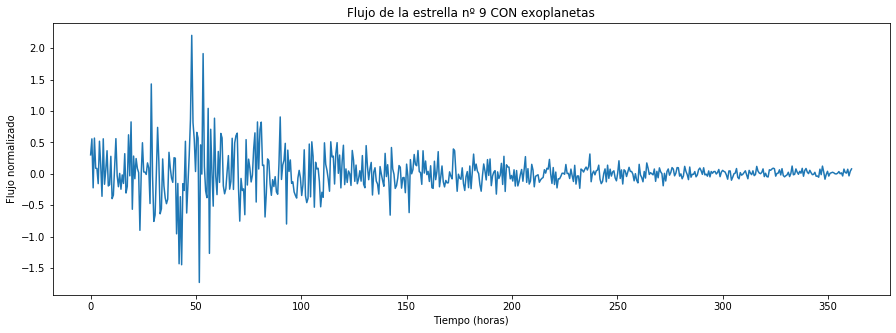

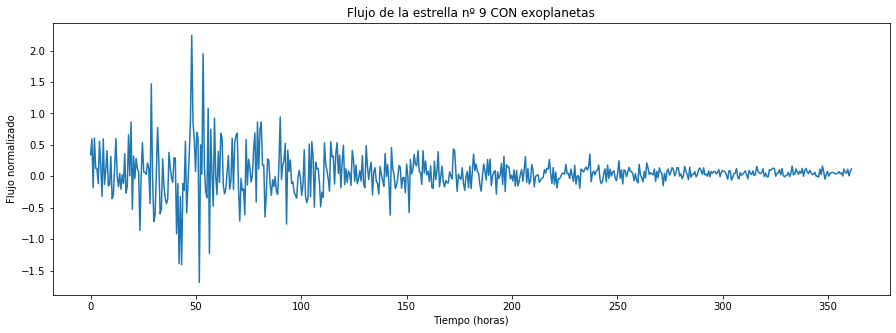

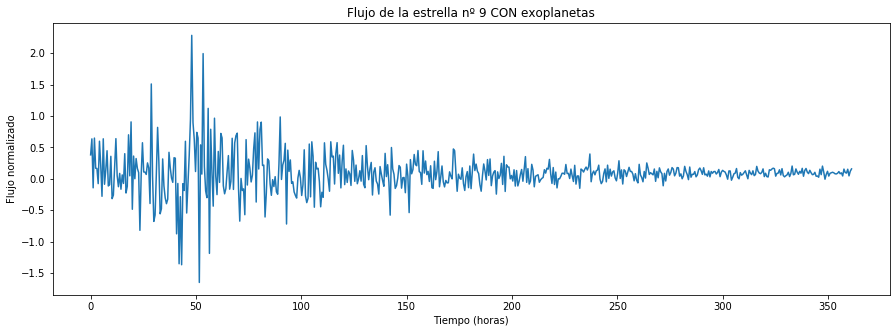

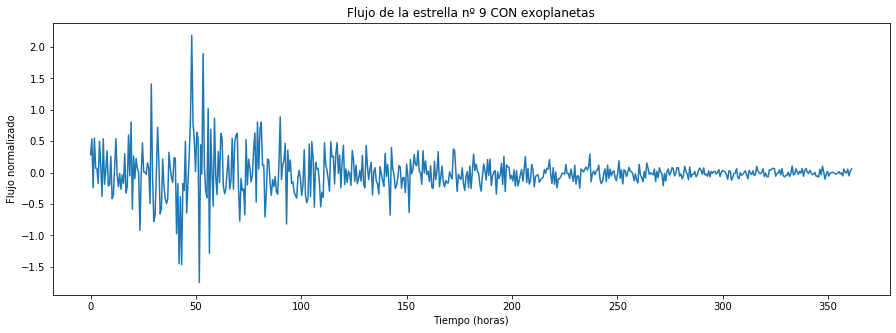

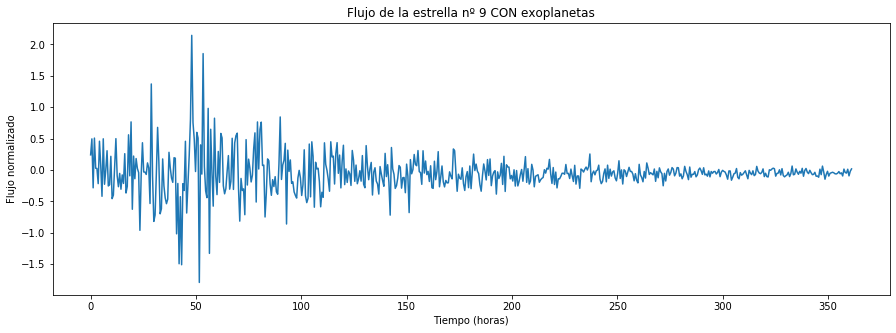

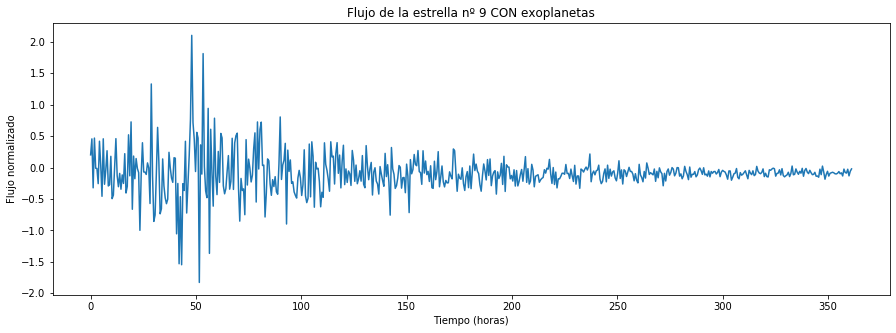

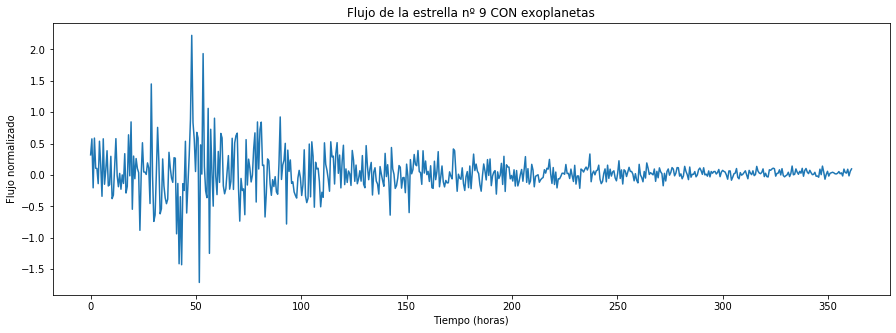

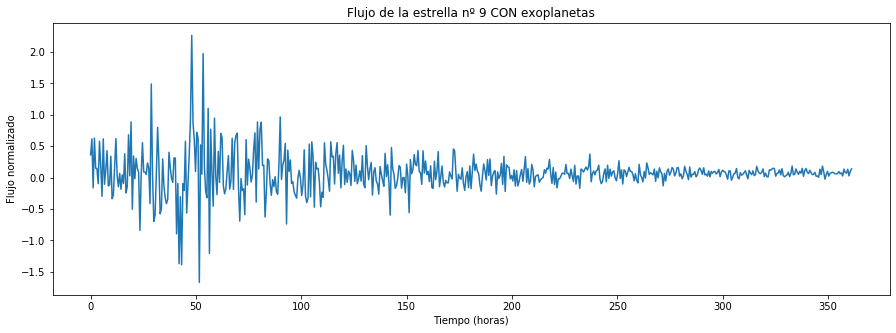

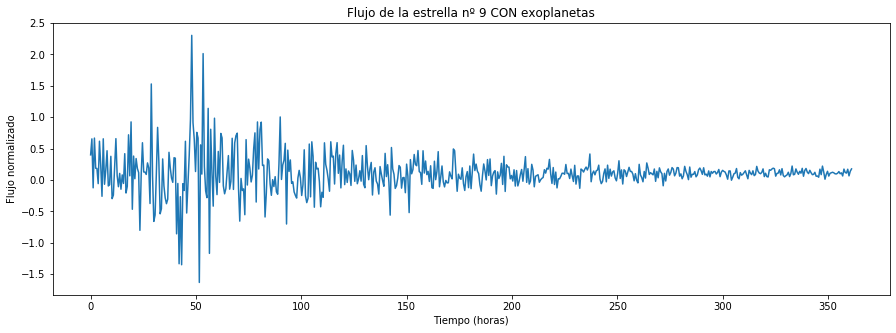

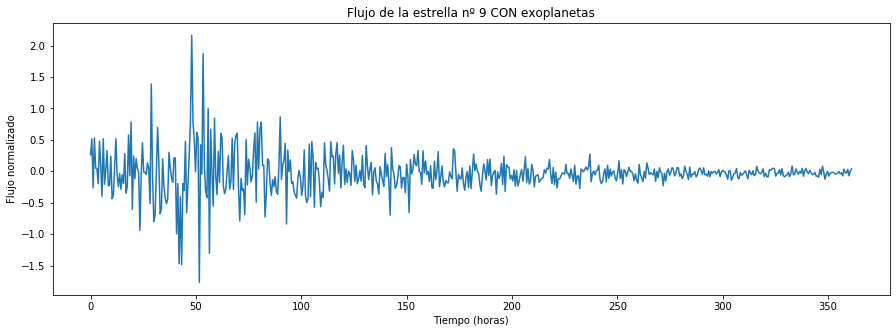

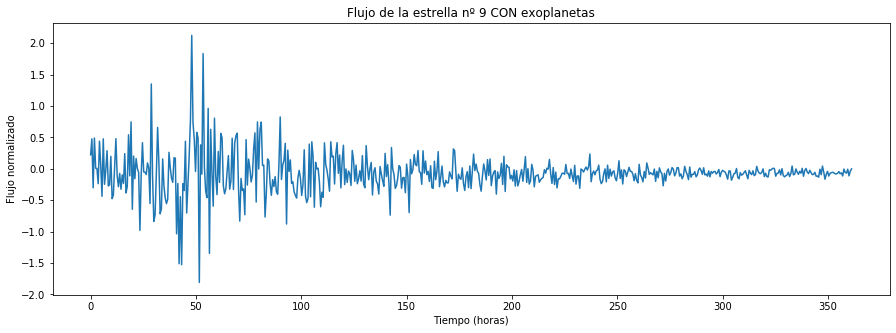

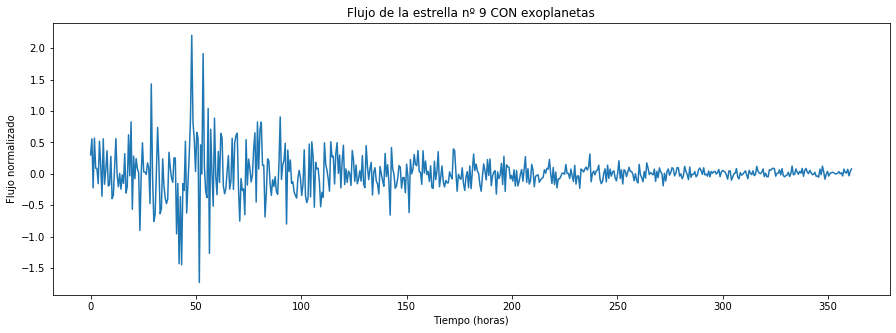

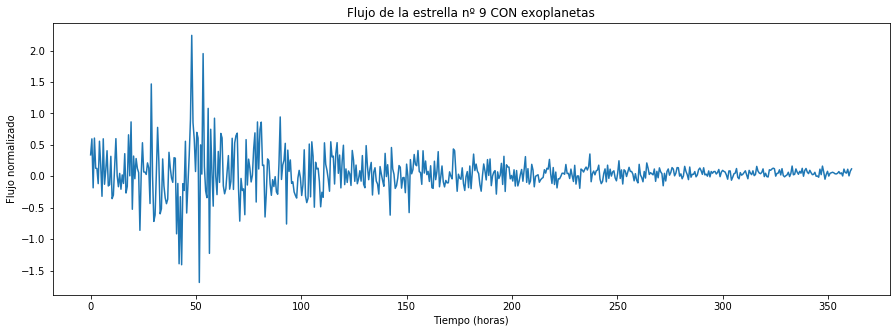

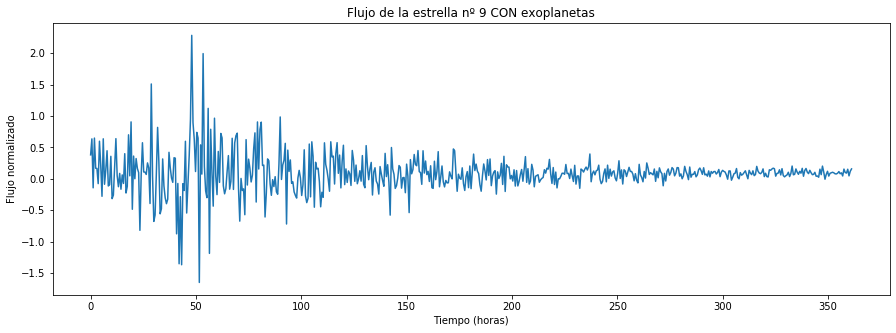

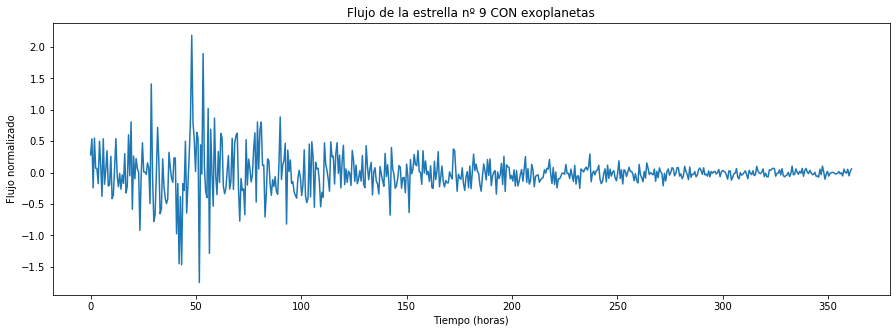

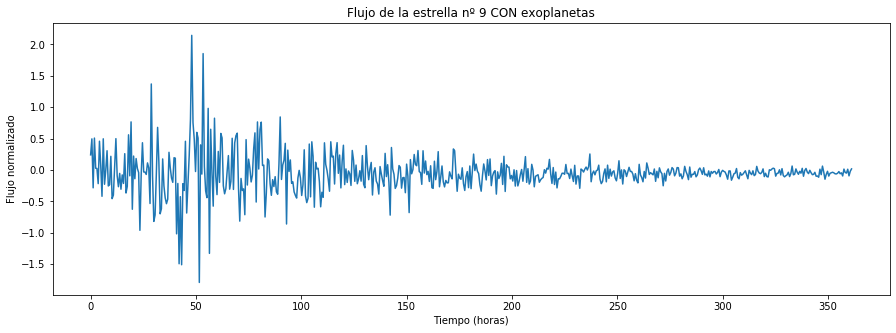

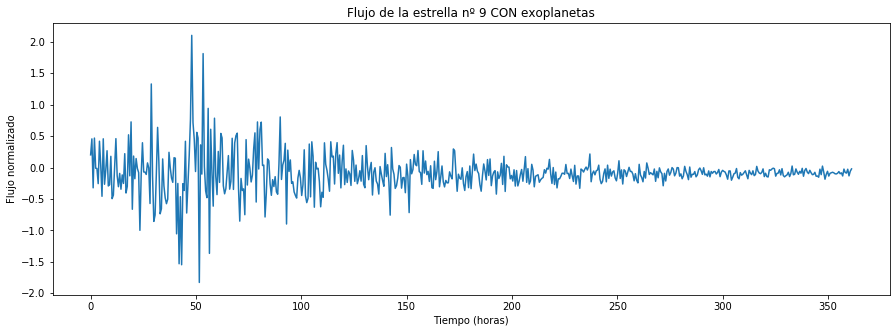

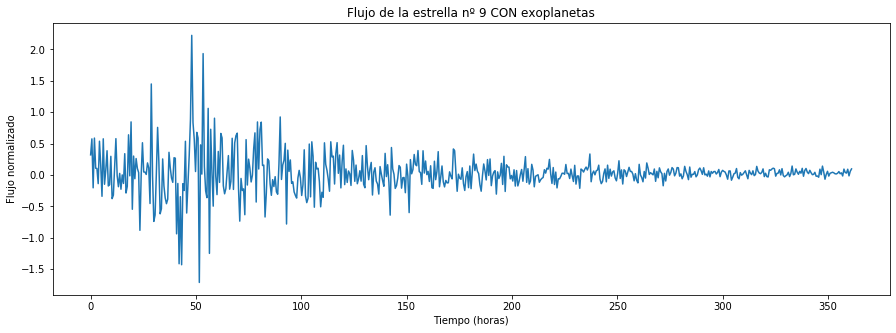

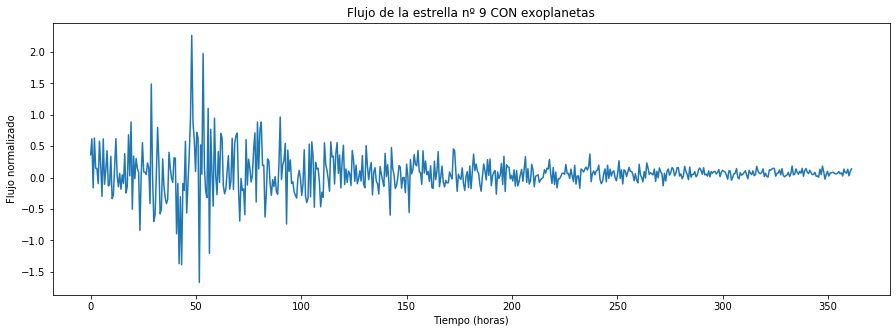

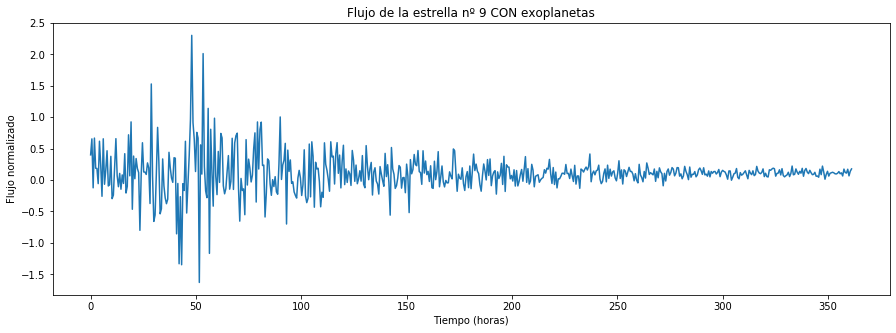

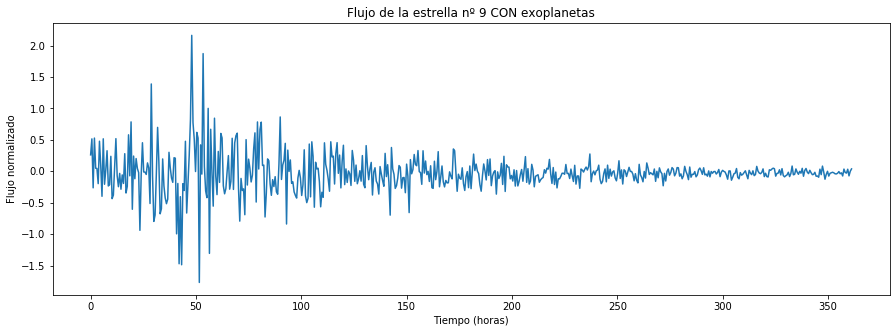

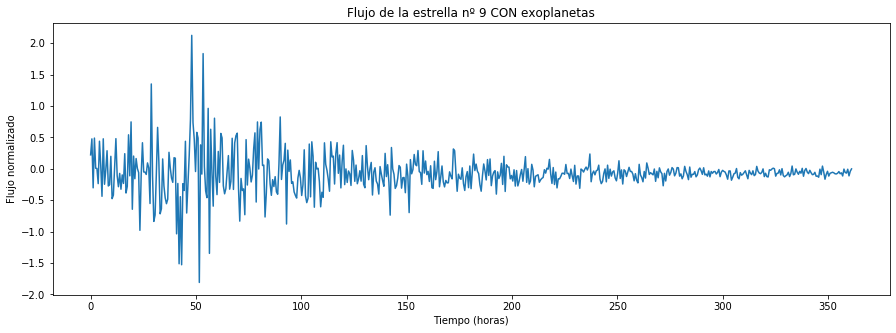

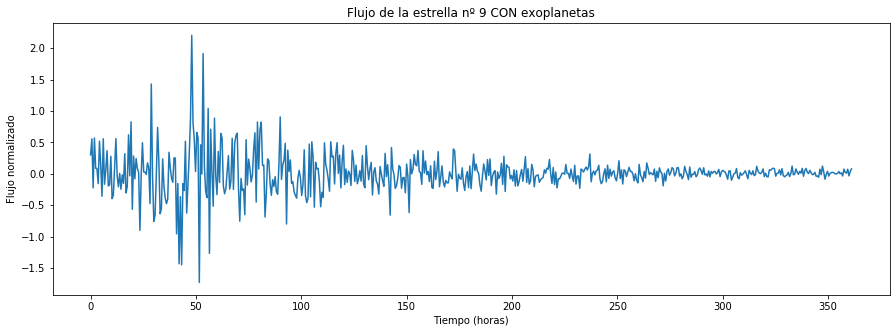

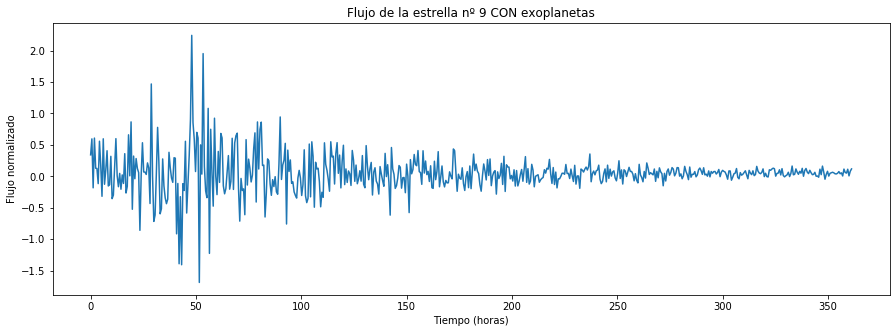

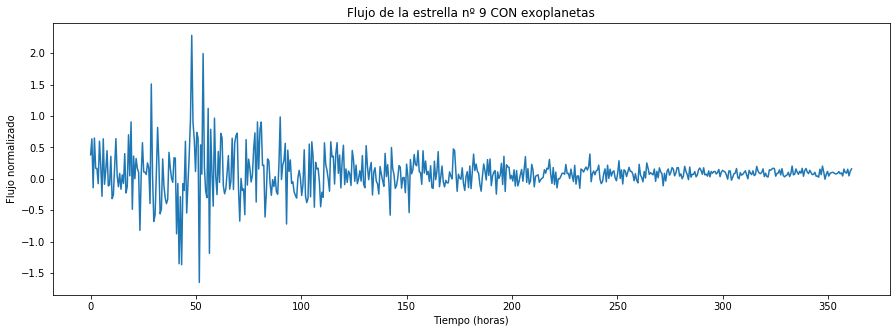

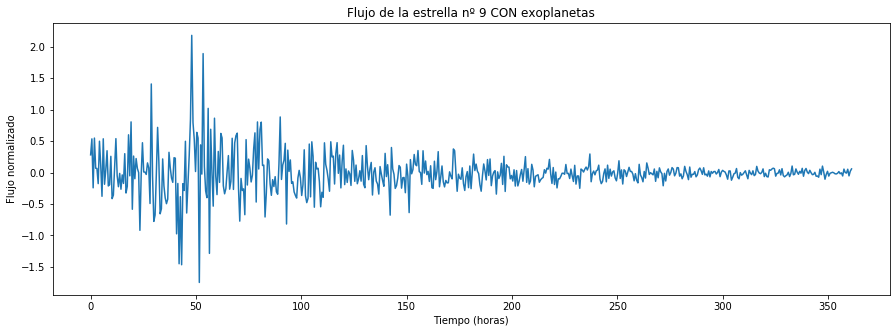

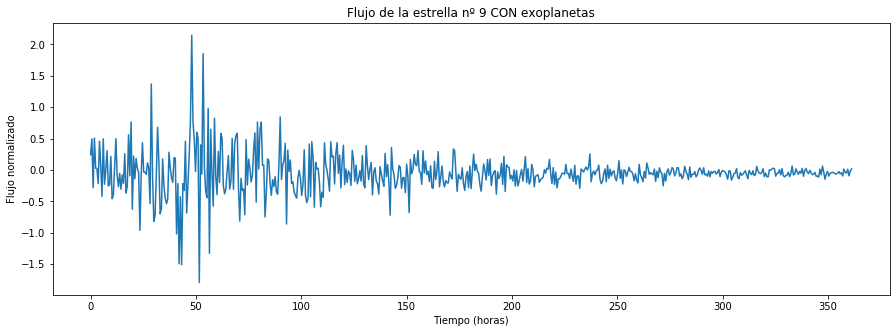

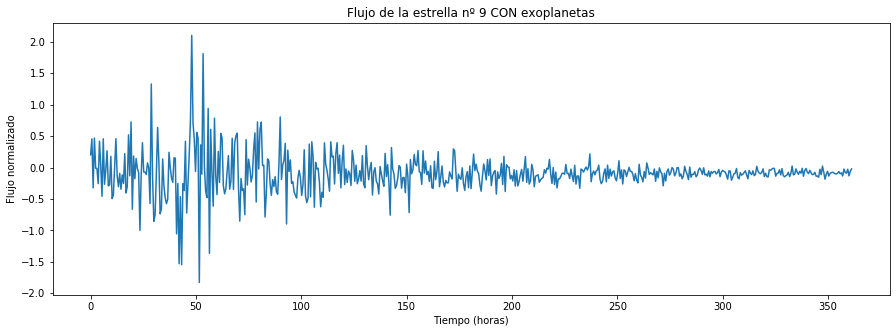

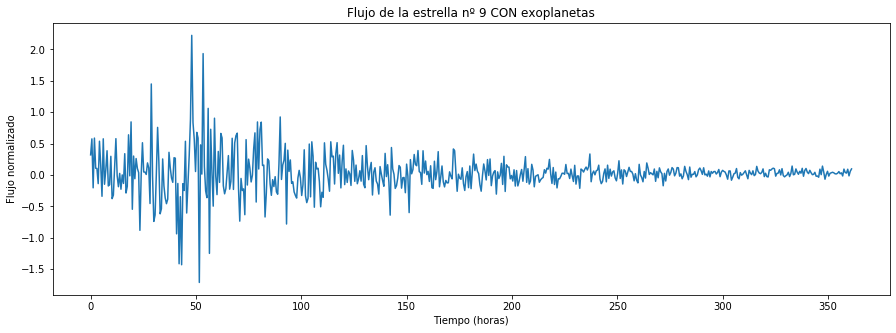

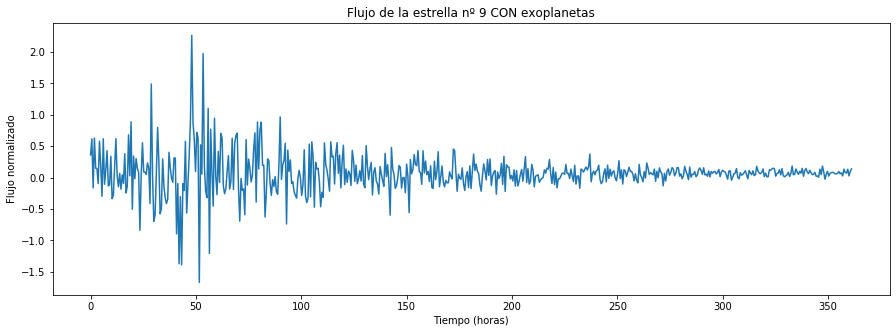

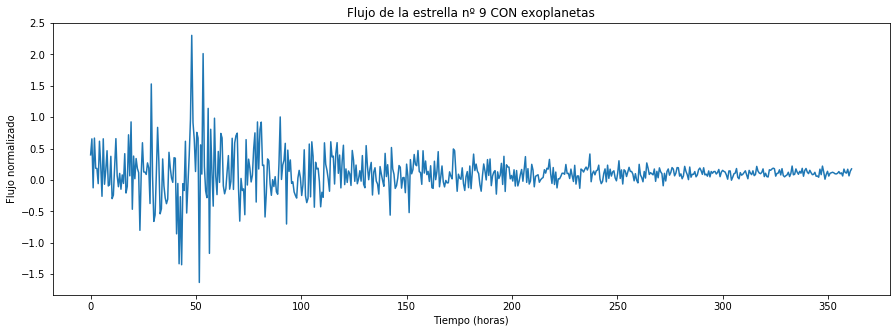

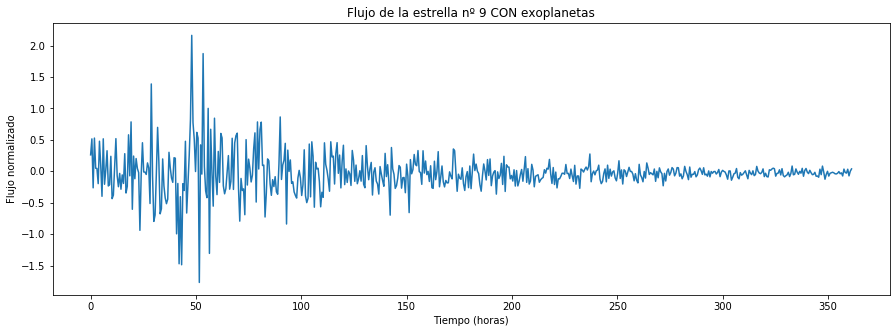

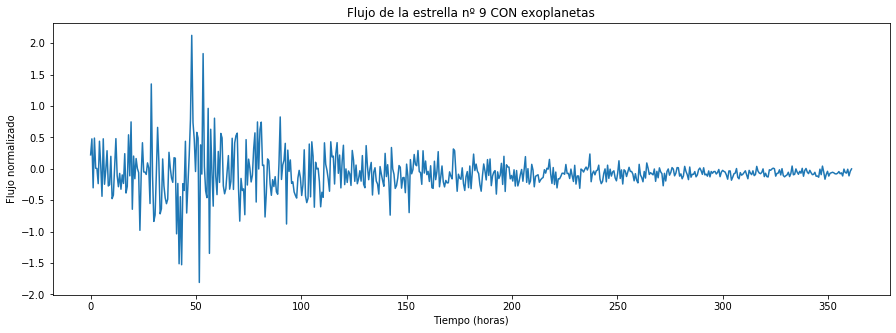

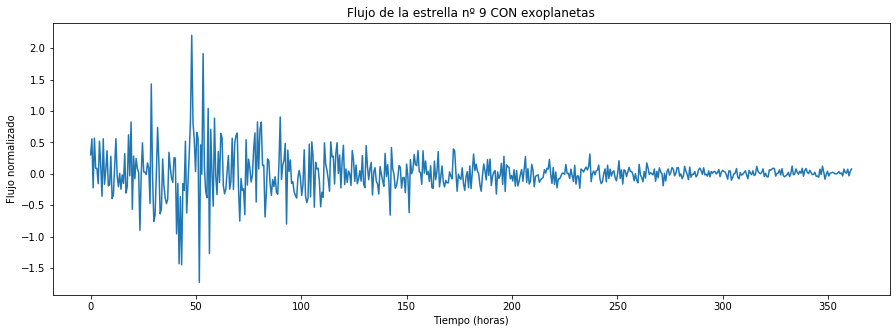

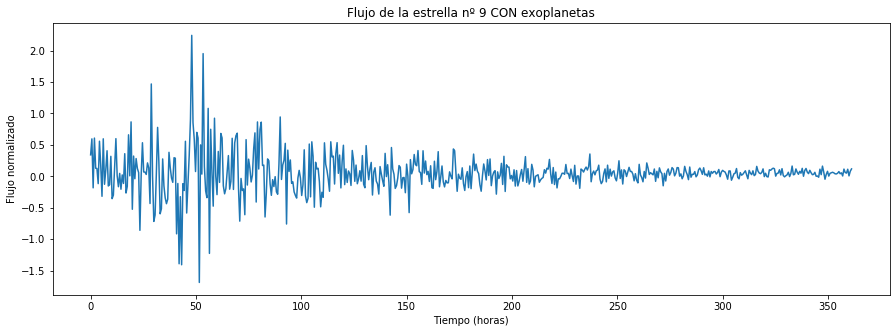

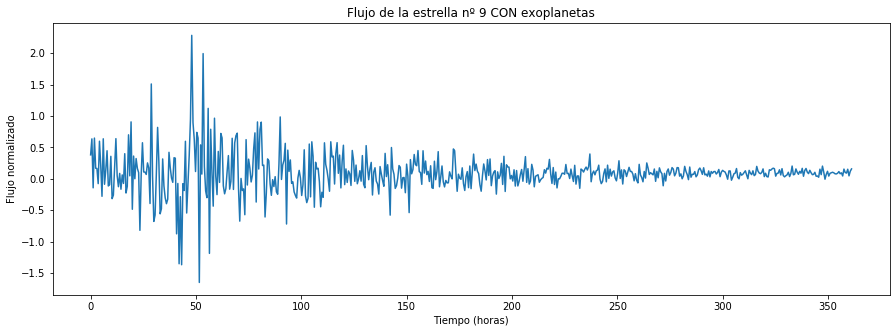

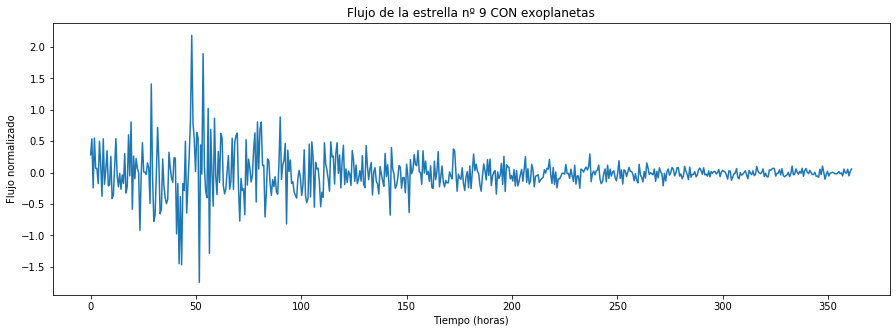

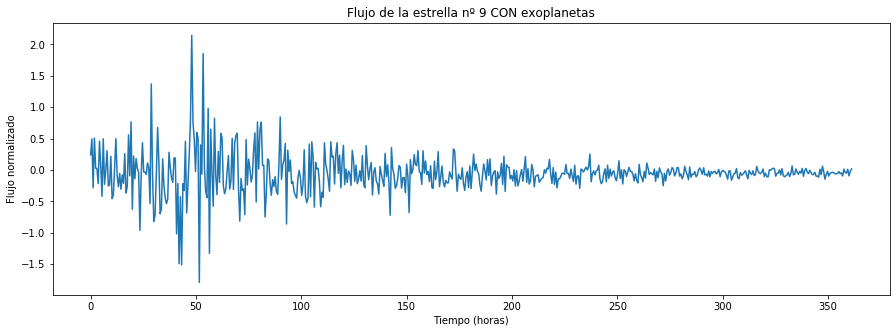

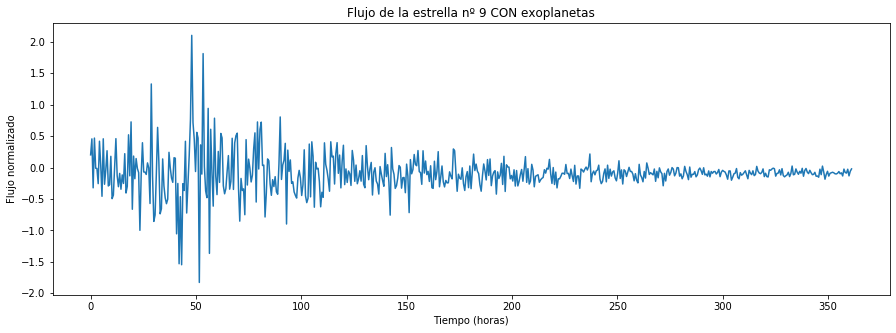

In [25]:
i = 9
while i < (len(flujos_exo_da)-1):
#Se extraen los datos de las distintas mediciones de luz, eliminando la columna "LABEL"
    flujo = flujos_exo_da.iloc[i,:]
    tiempo = np.arange(len(flujo)) * (36/60) #Variable "tiempo" en horas
    plt.figure(figsize=(15, 5)) #Tamaño del gráfico
    plt.title('Flujo de la estrella nº 9 CON exoplanetas')
    plt.xlabel('Tiempo (horas)')
    plt.ylabel('Flujo normalizado')
    plt.plot(tiempo, flujo)
    plt.rcParams.update({'figure.max_open_warning': 0})
    i += 74
    
plt.show()

# Generar dataset de entrenamiento
Tras realizar el primer tratamiento de datos, *PCA* y las dos técnicas de *data augmentation*, el siguiente paso es generar el *dataset* de entrenamiento con todos los datos

In [26]:
label = [2] * len(flujos_exo_da)
flujos_exo_da.insert(0, 'LABEL', label, True) #Insertar la columna 'LABEL' con todos los valores igual a '2'
flujos_exo_da

LABEL    FLUX.1    FLUX.2    FLUX.3    FLUX.4    FLUX.5    FLUX.6  \
0         2  0.064657  0.096775 -0.025112 -0.065888 -0.005493 -0.128811   
1         2  0.280902  0.051640  0.132471 -0.162766 -0.081271 -0.007710   
2         2 -0.095377  0.212582 -0.554484  0.243481  0.200693  0.329420   
3         2 -0.436844  0.222025 -0.404767  0.269585 -0.149680  0.317270   
4         2  0.156385  0.089766 -0.235699 -0.101338 -0.154256  0.326667   
...     ...       ...       ...       ...       ...       ...       ...   
2844      2  0.023684 -0.143729 -0.088381 -0.066401 -0.111587 -0.160832   
2845      2  0.032063 -0.235370 -0.018679 -0.038811 -0.059494 -0.147944   
2846      2 -0.075598  0.080178 -0.234849  0.076402 -0.104667 -0.166866   
2847      2 -0.108298 -0.179033 -0.191851 -0.137490  0.094292 -0.133475   
2848      2 -0.123608 -0.048203  0.055908  0.105944 -0.156517 -0.122955   

        FLUX.7    FLUX.8    FLUX.9  ...  FLUX.594  FLUX.595  FLUX.596  \
0     0.052731  0.180928  0.435949  ...  0.156446 -0.122977  0.012988   
1    -0.063518  0.267813  0.160459  ... -0.049246  0.027473 -0.015339   
2    -0.143710  0.496918 -0.051265  ... -0.035973 -0.079473 -0.017117   
3    -0.205330  0.543809  0.133126  ...  0.027824  0.134666  0.093335   
4    -0.209556  0.383505 -0.040992  ... -0.085062 -0.021682  0.148226   
...        ...       ...       ...  ...       ...       ...       ...   
2844 -0.117576 -0.114774 -0.082425  ... -0.106396 -0.082249 -0.124477   
2845 -0.141696 -0.180650 -0.026279  ... -0.086762 -0.115366 -0.107863   
2846 -0.212455 -0.049279 -0.116961  ... -0.132995 -0.026554 -0.121846   
2847 -0.086013 -0.034150 -0.148294  ... -0.127123 -0.052251 -0.048172   
2848 -0.360031  0.065988 -0.046692  ... -0.128226 -0.104220 -0.017934   

      FLUX.597  FLUX.598  FLUX.599  FLUX.600  FLUX.601  FLUX.602  FLUX.603  
0    -0.016150 -0.153618 -0.018907  0.000045 -0.057146 -0.007258  0.021993  
1    -0.100788  0.014846  0.051353 -0.040544 -0.033794 -0.004559  0.132357  
2    -0.107141  0.103257 -0.003246  0.100657  0.103516 -0.021492 -0.089290  
3     0.015113 -0.104497  0.140892 -0.123511 -0.084596 -0.027630 -0.125627  
4     0.113885  0.166970  0.031739  0.082830 -0.100400  0.113083  0.009205  
...        ...       ...       ...       ...       ...       ...       ...  
2844 -0.092296 -0.068009 -0.110904 -0.092151 -0.093753 -0.079786 -0.130042  
2845 -0.090109 -0.115486 -0.068469 -0.092227 -0.097025 -0.069081 -0.117160  
2846 -0.081828 -0.121530 -0.067836 -0.090588 -0.082291 -0.183457 -0.168677  
2847 -0.062904 -0.048704 -0.095954 -0.040680 -0.230801 -0.104386 -0.061748  
2848 -0.121108 -0.146582 -0.080232 -0.143650  0.064671 -0.092194 -0.007354  

[2849 rows x 604 columns]

In [27]:
kepler_train_data_final = pd.DataFrame(flujos_exo_da) #Instanciar nuevo DataFrame con los datos de las estrellas con exoplanetas
kepler_train_data_final = kepler_train_data_final.append(kepler_train_data_pca[kepler_train_data_pca.LABEL == 1].iloc[:,:], ignore_index = True) #Añadir los datos de las estrellas sin exoplanetas
kepler_train_data_final

LABEL    FLUX.1    FLUX.2    FLUX.3    FLUX.4    FLUX.5    FLUX.6  \
0         2  0.064657  0.096775 -0.025112 -0.065888 -0.005493 -0.128811   
1         2  0.280902  0.051640  0.132471 -0.162766 -0.081271 -0.007710   
2         2 -0.095377  0.212582 -0.554484  0.243481  0.200693  0.329420   
3         2 -0.436844  0.222025 -0.404767  0.269585 -0.149680  0.317270   
4         2  0.156385  0.089766 -0.235699 -0.101338 -0.154256  0.326667   
...     ...       ...       ...       ...       ...       ...       ...   
7894      1 -3.936119  0.222828 -0.168616 -0.652407 -0.568182  2.094444   
7895      1 -0.091921  1.186475  1.311370  0.323385 -0.594974 -0.652316   
7896      1  0.114565  0.210029  0.394792  0.090145  0.045819 -0.217128   
7897      1 -0.004102 -0.161846  0.041366  0.126275 -0.002037 -0.070416   
7898      1  0.320166 -0.382206 -0.145770 -0.418198  0.047609 -0.114099   

        FLUX.7    FLUX.8    FLUX.9  ...  FLUX.594  FLUX.595  FLUX.596  \
0     0.052731  0.180928  0.435949  ...  0.156446 -0.122977  0.012988   
1    -0.063518  0.267813  0.160459  ... -0.049246  0.027473 -0.015339   
2    -0.143710  0.496918 -0.051265  ... -0.035973 -0.079473 -0.017117   
3    -0.205330  0.543809  0.133126  ...  0.027824  0.134666  0.093335   
4    -0.209556  0.383505 -0.040992  ... -0.085062 -0.021682  0.148226   
...        ...       ...       ...  ...       ...       ...       ...   
7894 -0.296745 -1.226294  0.457405  ... -0.018309 -0.020405  0.010741   
7895  0.471931  1.509093  1.447173  ... -0.057525 -0.026347  0.062468   
7896 -0.025548  0.043999 -0.194226  ... -0.017591 -0.008258 -0.022283   
7897  0.018862  0.026613  0.005338  ...  0.000200 -0.006178 -0.011159   
7898  0.096102 -0.066002  0.185191  ... -0.039376 -0.036341  0.007666   

      FLUX.597  FLUX.598  FLUX.599  FLUX.600  FLUX.601  FLUX.602  FLUX.603  
0    -0.016150 -0.153618 -0.018907  0.000045 -0.057146 -0.007258  0.021993  
1    -0.100788  0.014846  0.051353 -0.040544 -0.033794 -0.004559  0.132357  
2    -0.107141  0.103257 -0.003246  0.100657  0.103516 -0.021492 -0.089290  
3     0.015113 -0.104497  0.140892 -0.123511 -0.084596 -0.027630 -0.125627  
4     0.113885  0.166970  0.031739  0.082830 -0.100400  0.113083  0.009205  
...        ...       ...       ...       ...       ...       ...       ...  
7894 -0.061041 -0.020155 -0.026920 -0.073979  0.066780  0.023091 -0.032884  
7895  0.035424  0.009845 -0.004290  0.036974  0.039621 -0.012367 -0.031708  
7896 -0.008808  0.013437  0.014521  0.013996 -0.002984 -0.013145  0.012657  
7897 -0.009062 -0.010222 -0.000986  0.005668  0.002577 -0.005036 -0.001129  
7898 -0.018523  0.005245  0.026081  0.028706  0.058605  0.002981  0.028150  

[7899 rows x 604 columns]

Arriba se muestra el *dataset* final con el que se entrenará el modelo. Los datos han sido tratados; sus dimensiones, reducidas; y su desbalanceamiento, corregido. Contiene un total de 7899 estrellas, de las cuales 2849 tienen exoplanetas -'*LABEL*' = '2'- y 5050 no tienen exoplanetas -'*LABEL*' = '1'-

# Modelo de predicción

El modelo de predicción consistirá en una red neuronal artificial entrenada con los datos de entrenamiento finales -tras el primer tratamiento, reducción de dimensiones y *data augmentation*- y probada con los datos de test, que se están conformados por 565 no exoplanetas y 5 exoplanetas.

In [71]:
#Cargar en variables distintas los datos de entrenamiento y test, separando las dimensiones de la clase
x_entreno = kepler_train_data_final.drop('LABEL', axis = 1)
y_entreno = kepler_train_data_final['LABEL']
x_test = kepler_test_data_pca.drop('LABEL', axis = 1)
y_test = kepler_test_data_pca['LABEL']

##### Construcción y entrenamiento de la red

In [80]:
#Instanciar modelo secuencial: el output de cada capa creada es el input de la siguiente
modelo = Sequential()

#Capa neuronal oculta tipo dense -con todas las conexiones entre neuronas- con las dimensiones de entrada del dataset de entrenamiento y 100 dimensiones de salida
modelo.add(Dense(100, input_dim=x_entreno.shape[1]))

#Capa neuronal de salida con 100 dimensiones de entrada y 1 de salida -clasificacion binaria-, con la funcion de activacion 'sigmoid'
modelo.add(Dense(1, activation='sigmoid'))

#Compilar el modelo con la loss function "binary_crossentropy" ya que la clasificacion es binaria
modelo.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#Entrenar el modelo que estos parametros y los datos de validacion de test
modelo.fit(x_entreno, y_entreno, batch_size=20, epochs=10, validation_data=(x_test, y_test))

Train on 7899 samples, validate on 570 samples
Epoch 1/10
7899/7899 [==============================] - 1s 92us/step - loss: -4.2711 - accuracy: 0.5930 - val_loss: 0.0597 - val_accuracy: 0.9807
Epoch 2/10
7899/7899 [==============================] - 1s 66us/step - loss: -5.7133 - accuracy: 0.6341 - val_loss: 0.0088 - val_accuracy: 0.9825
Epoch 3/10
7899/7899 [==============================] - 1s 67us/step - loss: -5.7404 - accuracy: 0.6383 - val_loss: -0.0089 - val_accuracy: 0.9825
Epoch 4/10
7899/7899 [==============================] - 1s 69us/step - loss: -5.7454 - accuracy: 0.6391 - val_loss: -0.0143 - val_accuracy: 0.9825
Epoch 5/10
7899/7899 [==============================] - 1s 70us/step - loss: -5.7456 - accuracy: 0.6391 - val_loss: -0.0175 - val_accuracy: 0.9825
Epoch 6/10
7899/7899 [==============================] - 1s 69us/step - loss: -5.7457 - accuracy: 0.6391 - val_loss: -0.0203 - val_accuracy: 0.9842
Epoch 7/10
7899/7899 [==============================] - 1s 71us/step - lo

##### Predicción y precisión

In [81]:
prediccion = modelo.predict_classes(x_test) #Crear prediccion
prediccion = np.where(prediccion == 0, 2, prediccion) #Ajustar valores para que concuerden con los del dataset

#Crear la matriz de confusion
cm = confusion_matrix(y_test, prediccion)
cm = {'Real: SIN exoplanetas': cm[0], 'Real: CON exoplanetas': cm[1]}
cm = pd.DataFrame.from_dict(cm, orient = 'index', columns = ['Predicción: SIN exoplanetas', 'Predicción: CON exoplanetas'])

#Medir la precision del modelo
print("La precisión total del modelo es del: {}%".format(round(accuracy_score(y_test,prediccion), 4)*100))
cm

La precisión total del modelo es del: 98.95%


Predicción: SIN exoplanetas  \
Real: SIN exoplanetas                          562   
Real: CON exoplanetas                            3   

                       Predicción: CON exoplanetas  
Real: SIN exoplanetas                            3  
Real: CON exoplanetas                            2

El modelo ha logrado predecir 2 de los 5 exoplanetas, y 562 de los 565 no exoplanetas. La precisión total de las predicciones del modelo es del 98.95%